# Exploratory Data Analysis (EDA) Notebook

## Introduction

With the data cleaning process complete, we now move on to **Exploratory Data Analysis (EDA)**. In this phase, we will explore the characteristics of our dataset to uncover patterns, relationships, and insights that will inform our modeling approach. EDA will help us understand the distribution of data, identify potential issues, and derive key insights that are crucial for building effective machine learning models.

### Project Goal

The ultimate goal of this project is to build a portfolio of stocks that can beat the S&P 500 index. Using machine learning models, we aim to select stocks with the highest probability of outperforming the market based on financial indicators and historical data. By ensuring our dataset is clean and well-prepared, we will lay a solid foundation for accurate model training and testing, driving us closer to this goal.

### Key Steps in EDA

1. **Descriptive Statistics**: Summarize the central tendency, dispersion, and shape of the dataset’s distribution. We will calculate key metrics like mean, median, and standard deviation for the numerical features.

2. **Data Visualization**: Visualize the distribution of variables and relationships between features using various plots (histograms, box plots, scatter plots, heatmaps, etc.). This will help us identify trends, correlations, and outliers.

3. **Correlation Analysis**: Explore the relationships between features to identify highly correlated variables. These insights will guide feature selection and help avoid multicollinearity in modeling.

4. **Outlier Detection**: Detect and analyze outliers that could skew the results of our models. We will decide whether to remove, transform, or keep these outliers.
   
5. **Next Steps.**

By conducting a thorough EDA, we will gain valuable insights into the data, which will inform our decisions during model development and help us achieve the project’s goal of building a robust, market-beating stock portfolio.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram


### Loading Datasets

In [2]:
# Load datasets from 2000 to 2023
full_df = {}
for year in range(2000, 2024):
    file_path = f'./data/cleaned_data//premodeling_data/{year}_Financial_Data_Cleaned.csv'
    try:
        full_df[year] = pd.read_csv(file_path)
        print(f"Loaded data for {year}")
    except FileNotFoundError:
        print(f"File for {year} not found.")

# Print the head of each loaded dataset
for year, df in full_df.items():
    print(f"Head of {year}:")
    display(df.head())

Loaded data for 2000
Loaded data for 2001
Loaded data for 2002
Loaded data for 2003
Loaded data for 2004
Loaded data for 2005
Loaded data for 2006
Loaded data for 2007
Loaded data for 2008
Loaded data for 2009
Loaded data for 2010
Loaded data for 2011
Loaded data for 2012
Loaded data for 2013
Loaded data for 2014
Loaded data for 2015
Loaded data for 2016
Loaded data for 2017
Loaded data for 2018
Loaded data for 2019
Loaded data for 2020
Loaded data for 2021
Loaded data for 2022
Loaded data for 2023
Head of 2000:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HRJ.L,2000.0,260000000.0,424000000.0,684000000.0,8.500000e+08,146000000.0,2.046000e+09,1.264200e+10,0.0,...,US,2000-01-03,False,False,False,0.0,5.12,3.4,3.966667,4.077586
1,0HST.L,2000.0,27000000.0,0.0,27000000.0,4.430000e+08,127000000.0,1.168000e+09,1.644000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.12,3.4,3.966667,4.077586
2,0JVQ.L,2000.0,455658000.0,12871000.0,468529000.0,1.609850e+08,260129000.0,4.175013e+09,7.034960e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.12,3.4,3.966667,4.077586
3,0KXA.L,2000.0,190000000.0,0.0,190000000.0,1.250000e+09,500000000.0,3.206000e+09,1.616000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.12,3.4,3.966667,4.077586
4,0LWH.L,2000.0,114000000.0,0.0,114000000.0,1.748000e+09,256000000.0,3.237000e+09,2.134000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.12,3.4,3.966667,4.077586


Head of 2001:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HRJ.L,2001.0,137000000.0,481000000.0,618000000.0,8.780000e+08,210000000.0,2.074000e+09,1.297200e+10,0.0,...,US,2000-01-03,False,False,False,0.0,5.07,2.8,4.741667,0.955538
1,0HST.L,2001.0,24000000.0,0.0,24000000.0,4.420000e+08,46000000.0,1.221000e+09,1.637000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.07,2.8,4.741667,0.955538
2,0JVQ.L,2001.0,798839000.0,54389000.0,853228000.0,1.655780e+08,198306000.0,4.920392e+09,8.653439e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.07,2.8,4.741667,0.955538
3,0KXA.L,2001.0,121000000.0,0.0,121000000.0,6.800000e+08,144000000.0,1.697000e+09,1.075000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.07,2.8,4.741667,0.955538
4,0LWH.L,2001.0,316000000.0,0.0,316000000.0,1.515000e+09,135000000.0,3.311000e+09,2.052000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,5.07,2.8,4.741667,0.955538


Head of 2002:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HRJ.L,2002.0,264000000.0,0.0,2.640000e+08,7.990000e+08,418000000.0,1.789000e+09,1.328600e+10,0.0,...,US,2000-01-03,False,False,False,0.0,3.83,1.6,5.783333,1.700447
1,0HST.L,2002.0,21000000.0,0.0,2.100000e+07,4.170000e+08,123000000.0,1.199000e+09,1.684000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,3.83,1.6,5.783333,1.700447
2,0JVQ.L,2002.0,853000000.0,273000000.0,1.126000e+09,1.720000e+08,244000000.0,5.568000e+09,1.035200e+10,0.0,...,US,2000-01-03,False,False,False,0.0,3.83,1.6,5.783333,1.700447
3,0KXA.L,2002.0,289000000.0,0.0,2.890000e+08,6.450000e+08,109000000.0,1.775000e+09,9.880000e+08,778000000.0,...,US,2000-01-03,False,False,False,0.0,3.83,1.6,5.783333,1.700447
4,0LWH.L,2002.0,192000000.0,0.0,1.920000e+08,1.781000e+09,118000000.0,3.327000e+09,2.338000e+09,0.0,...,US,2000-01-03,False,False,False,0.0,3.83,1.6,5.783333,1.700447


Head of 2003:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0KXA.L,2003.0,2.260000e+08,0.0,2.260000e+08,6.840000e+08,1.200000e+08,1.736000e+09,9.250000e+08,7.980000e+08,...,US,2000-01-03,False,False,False,19.571684,4.27,2.3,5.991667,2.795606
1,0Q19.L,2003.0,5.913000e+07,0.0,5.913000e+07,1.217100e+07,1.945000e+09,7.130100e+07,4.792000e+06,3.839800e+10,...,US,2000-05-19,False,False,False,-28.482972,4.27,2.3,5.991667,2.795606
2,0R3C.L,2003.0,5.726000e+09,0.0,5.726000e+09,3.126900e+10,0.000000e+00,3.699500e+10,3.184000e+09,0.000000e+00,...,US,2000-01-03,False,False,False,-0.781250,4.27,2.3,5.991667,2.795606
3,7HP.DE,2003.0,1.418800e+10,403000000.0,1.459100e+10,1.188600e+10,8.454000e+09,4.099600e+10,6.482000e+09,0.000000e+00,...,US,1998-11-13,False,False,False,35.242839,4.27,2.3,5.991667,2.795606
4,A,2003.0,1.607000e+09,0.0,1.607000e+09,1.086000e+09,1.910000e+08,3.889000e+09,1.447000e+09,0.000000e+00,...,US,1999-11-18,False,False,False,27.596968,4.27,2.3,5.991667,2.795606


Head of 2004:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0Q19.L,2004.0,2.884400e+07,30794000.0,5.963800e+07,1.148200e+07,8.280000e+05,7.194800e+07,4.471000e+06,3.839800e+10,...,US,2000-05-19,False,False,False,-22.813688,4.24,2.7,5.541667,3.847772
1,0R3C.L,2004.0,9.907000e+09,0.0,9.907000e+09,3.465000e+10,0.000000e+00,4.455700e+10,3.083000e+09,0.000000e+00,...,US,2000-01-03,False,False,False,2.966381,4.24,2.7,5.541667,3.847772
2,7HP.DE,2004.0,1.266300e+10,311000000.0,1.297400e+10,1.801000e+10,1.102000e+09,4.290100e+10,6.649000e+09,0.000000e+00,...,US,1998-11-13,False,False,False,22.837924,4.24,2.7,5.541667,3.847772
3,A,2004.0,2.315000e+09,0.0,2.315000e+09,1.044000e+09,1.920000e+08,4.577000e+09,1.258000e+09,0.000000e+00,...,US,1999-11-18,False,False,False,9.991974,4.24,2.7,5.541667,3.847772
4,AACS,2004.0,6.350600e+04,0.0,6.350600e+04,3.122820e+05,3.848100e+04,5.555760e+05,5.517103e+06,0.000000e+00,...,US,1996-04-15,False,False,False,-3.703704,4.24,2.7,5.541667,3.847772


Head of 2005:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0JCB.L,2005.0,1.641000e+09,0.000000e+00,1.641000e+09,2.926000e+09,115000000.0,7.409000e+09,1.180100e+10,5.043000e+09,...,US,2006-03-10,False,False,False,4.377487,4.39,3.4,5.083333,3.48355
1,0K6F.L,2005.0,1.935420e+08,9.764230e+08,1.169965e+09,2.968850e+08,70056000.0,1.575889e+09,4.187490e+08,2.918160e+08,...,US,2006-04-28,False,False,False,-53.785489,4.39,3.4,5.083333,3.48355
2,0Q19.L,2005.0,3.511100e+07,2.650900e+07,6.162000e+07,6.159000e+06,1042000.0,7.046100e+07,3.226000e+06,3.839800e+10,...,US,2000-05-19,False,False,False,52.181818,4.39,3.4,5.083333,3.48355
3,0QAH.L,2005.0,9.585300e+09,6.052300e+09,1.563760e+10,2.927300e+09,826300000.0,2.104930e+10,1.439820e+10,2.040000e+08,...,US,2006-03-06,False,False,False,24.187353,4.39,3.4,5.083333,3.48355
4,0R3C.L,2005.0,7.126000e+09,0.000000e+00,7.126000e+09,3.549700e+10,0.0,4.800000e+01,2.230000e+09,0.000000e+00,...,US,2000-01-03,False,False,False,-4.620690,4.39,3.4,5.083333,3.48355


Head of 2006:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2006.0,5.010000e+07,0.0,5.010000e+07,4.042000e+08,9.516000e+08,1.405900e+09,8.070000e+07,4.804000e+08,...,US,2018-01-29,False,False,False,-78.867624,4.71,3.2,4.608333,2.78454
1,0JQQ.L,2006.0,6.630000e+08,212000000.0,8.750000e+08,6.404000e+09,3.590000e+08,1.512200e+10,6.010000e+09,3.170000e+08,...,US,2007-11-16,False,False,False,-5.050505,4.71,3.2,4.608333,2.78454
2,0Q19.L,2006.0,3.796800e+07,26266000.0,6.423400e+07,9.312000e+06,9.990000e+05,7.572200e+07,1.706000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,-266.666667,4.71,3.2,4.608333,2.78454
3,2XT.DE,2006.0,1.050100e+09,0.0,1.050100e+09,4.184300e+09,1.472000e+09,6.706400e+09,2.539100e+09,2.505200e+09,...,US,2007-06-04,False,False,False,-23.228699,4.71,3.2,4.608333,2.78454
4,3LN.DE,2006.0,3.138800e+08,0.0,3.138800e+08,2.487720e+08,2.615000e+07,7.381090e+08,8.761720e+08,4.231690e+08,...,US,2007-01-24,False,False,False,-944.827586,4.71,3.2,4.608333,2.78454


Head of 2007:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2007.0,88600000.0,66400000.0,1.550000e+08,1.743900e+09,6.110000e+07,1.960000e+09,7.740000e+07,4.802000e+08,...,US,2018-01-29,False,False,False,44.414894,4.04,2.8,4.616667,2.003858
1,0Q19.L,2007.0,40697000.0,39911000.0,8.060800e+07,4.893000e+06,1.765000e+06,8.726600e+07,1.626000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,76.923077,4.04,2.8,4.616667,2.003858
2,2XT.DE,2007.0,698900000.0,0.0,6.989000e+08,4.459800e+09,1.764500e+09,6.923200e+09,2.764600e+09,3.975200e+09,...,US,2007-06-04,False,False,False,15.658091,4.04,2.8,4.616667,2.003858
3,3LN.DE,2007.0,338991000.0,0.0,3.389910e+08,2.643160e+08,1.244600e+07,8.344080e+08,9.150450e+08,4.715420e+08,...,US,2007-01-24,False,False,False,95.190713,4.04,2.8,4.616667,2.003858
4,3V64.DE,2007.0,275379000.0,747080000.0,1.022459e+09,2.547160e+08,9.614700e+07,2.506939e+09,3.130920e+08,0.000000e+00,...,US,2008-03-31,False,False,False,36.708861,4.04,2.8,4.616667,2.003858


Head of 2008:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2008.0,1.983000e+08,3.370000e+07,2.320000e+08,1.785300e+09,6.190000e+07,2.079200e+09,8.260000e+07,4.843000e+08,...,US,2018-01-29,False,False,False,-2.872777,2.25,3.8,5.8,0.113587
1,0Q19.L,2008.0,1.332800e+07,7.130100e+07,8.462900e+07,5.390000e+06,6.006000e+06,9.602500e+07,1.271000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,51.851852,2.25,3.8,5.8,0.113587
2,0QAH.L,2008.0,4.368300e+09,1.118100e+09,5.486400e+09,3.778900e+09,7.756300e+09,1.930490e+10,1.199960e+10,1.438700e+09,...,US,2006-03-06,False,False,False,-3.022916,2.25,3.8,5.8,0.113587
3,2XT.DE,2008.0,2.297300e+09,0.000000e+00,2.297300e+09,3.786400e+09,1.623500e+09,7.707200e+09,2.353000e+09,3.783600e+09,...,US,2007-06-04,False,False,False,-18.388060,2.25,3.8,5.8,0.113587
4,3LN.DE,2008.0,1.996600e+08,0.000000e+00,1.996600e+08,2.172860e+08,2.851700e+07,6.398180e+08,8.877350e+08,2.052960e+08,...,US,2007-01-24,False,False,False,17.555373,2.25,3.8,5.8,0.113587


Head of 2009:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2009.0,2.809000e+08,246500000.0,5.274000e+08,1.392300e+09,8.390000e+07,2.003600e+09,7.540000e+07,5.111000e+08,...,US,2018-01-29,False,False,False,2.749446,3.85,-0.4,9.283333,-2.5765
1,0JQQ.L,2009.0,1.046000e+09,394000000.0,1.440000e+09,6.122000e+09,2.961000e+09,1.839400e+10,8.712000e+09,5.230000e+08,...,US,2007-11-16,False,False,False,-1.098901,3.85,-0.4,9.283333,-2.5765
2,0Q19.L,2009.0,1.210400e+07,88494000.0,1.005980e+08,5.995000e+06,6.441000e+06,1.128500e+08,1.148000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,22.857143,3.85,-0.4,9.283333,-2.5765
3,0QAH.L,2009.0,9.311400e+09,293100000.0,9.604500e+09,6.602900e+09,4.165900e+09,2.842860e+10,1.827350e+10,1.192310e+10,...,US,2006-03-06,False,False,False,-9.943721,3.85,-0.4,9.283333,-2.5765
4,2025.TW,2009.0,1.766610e+08,310846000.0,4.875070e+08,1.238470e+08,5.265300e+07,1.459166e+09,2.008496e+09,0.000000e+00,...,US,2000-01-03,False,False,False,-65.413534,3.85,-0.4,9.283333,-2.5765


Head of 2010:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2010.0,4.126000e+08,0.000000e+00,4.126000e+08,3.543000e+08,2.255000e+08,9.924000e+08,8.740000e+07,5.095000e+08,...,US,2018-01-29,False,False,False,1.442308,3.3,1.6,9.608333,2.695193
1,0JQQ.L,2010.0,6.150000e+08,7.390000e+08,1.354000e+09,4.808000e+09,2.884000e+09,2.750400e+10,9.500000e+09,6.020000e+08,...,US,2007-11-16,False,False,False,-9.638554,3.3,1.6,9.608333,2.695193
2,0Q19.L,2010.0,1.709800e+07,9.868100e+07,1.157790e+08,5.906000e+06,5.897000e+06,1.275820e+08,1.348000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,-86.965812,3.3,1.6,9.608333,2.695193
3,0QAH.L,2010.0,1.090000e+10,1.301000e+09,1.220100e+10,7.344000e+09,3.651000e+09,2.906400e+10,1.708200e+10,1.237800e+10,...,US,2006-03-06,False,False,False,20.400944,3.3,1.6,9.608333,2.695193
4,2025.TW,2010.0,1.475280e+08,2.662230e+08,4.137510e+08,2.122630e+08,4.394300e+07,1.259374e+09,2.105560e+09,0.000000e+00,...,US,2000-01-03,False,False,False,6.775701,3.3,1.6,9.608333,2.695193


Head of 2011:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2011.0,2.415000e+08,0.000000e+00,2.415000e+08,4.066000e+08,1.033000e+08,7.514000e+08,8.310000e+07,7.356000e+08,...,US,2018-01-29,False,False,False,42.105263,1.89,3.2,8.933333,1.564407
1,0JQQ.L,2011.0,1.291000e+09,1.760000e+08,1.467000e+09,3.439000e+09,2.901000e+09,2.695400e+10,9.812000e+09,6.030000e+08,...,US,2007-11-16,False,False,False,31.177446,1.89,3.2,8.933333,1.564407
2,0Q19.L,2011.0,1.495400e+07,1.244580e+08,1.394120e+08,5.116000e+06,4.568000e+06,1.490960e+08,1.235000e+06,3.649800e+07,...,US,2000-05-19,False,False,False,8.145240,1.89,3.2,8.933333,1.564407
3,0QAH.L,2011.0,1.353100e+10,1.441000e+09,1.497200e+10,8.261000e+09,3.694000e+09,3.318100e+10,1.629700e+10,1.215500e+10,...,US,2006-03-06,False,False,False,18.034534,1.89,3.2,8.933333,1.564407
4,2025.TW,2011.0,1.160770e+08,2.635910e+08,3.796680e+08,0.000000e+00,2.466630e+08,1.302080e+09,1.905317e+09,0.000000e+00,...,US,2000-01-03,False,False,False,-3.631961,1.89,3.2,8.933333,1.564407


Head of 2012:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2012.0,3.205000e+08,0.000000e+00,3.205000e+08,3.707000e+08,8.620000e+07,7.774000e+08,7.900000e+07,7.800000e+08,...,US,2018-01-29,False,False,False,14.421828,1.78,2.1,8.075,2.289113
1,0JQQ.L,2012.0,1.291000e+09,1.760000e+08,1.467000e+09,3.439000e+09,9.856000e+09,1.611300e+10,9.812000e+09,6.030000e+08,...,US,2007-11-16,False,False,False,29.785748,1.78,2.1,8.075,2.289113
2,0Q16.L,2012.0,1.113520e+11,0.000000e+00,1.113520e+11,0.000000e+00,0.000000e+00,1.113520e+11,1.185800e+10,6.997600e+10,...,US,2004-12-20,False,False,False,-11.550862,1.78,2.1,8.075,2.289113
3,0Q1F.L,2012.0,4.900600e+10,0.000000e+00,4.900600e+10,0.000000e+00,0.000000e+00,4.900600e+10,1.451900e+10,4.817500e+10,...,US,2000-01-03,False,False,False,7.596553,1.78,2.1,8.075,2.289113
4,0QAH.L,2012.0,1.345100e+10,2.690000e+09,1.614100e+10,7.672000e+09,4.509000e+09,3.485700e+10,1.603000e+10,1.213400e+10,...,US,2006-03-06,False,False,False,14.042124,1.78,2.1,8.075,2.289113


Head of 2013:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2013.0,2.660000e+08,0.000000e+00,2.660000e+08,4.424000e+08,9.860000e+07,8.070000e+08,8.090000e+07,7.784000e+08,...,US,2018-01-29,False,False,False,14.051740,3.04,1.5,7.358333,2.11783
1,0JQQ.L,2013.0,3.121000e+09,4.330000e+08,3.554000e+09,5.098000e+09,2.750000e+09,2.853000e+10,1.013700e+10,3.640000e+08,...,US,2007-11-16,False,False,False,2.564103,3.04,1.5,7.358333,2.11783
2,0Q16.L,2013.0,1.313220e+11,0.000000e+00,1.313220e+11,0.000000e+00,0.000000e+00,1.313220e+11,1.047500e+10,6.984400e+10,...,US,2004-12-20,False,False,False,-0.790241,3.04,1.5,7.358333,2.11783
3,0Q1F.L,2013.0,3.490200e+10,0.000000e+00,3.490200e+10,0.000000e+00,0.000000e+00,3.490200e+10,1.489100e+10,4.808100e+10,...,US,2000-01-03,False,False,False,5.915916,3.04,1.5,7.358333,2.11783
4,0QAH.L,2013.0,1.562100e+10,1.865000e+09,1.748600e+10,7.184000e+09,4.789000e+09,3.568500e+10,1.497300e+10,1.230100e+10,...,US,2006-03-06,False,False,False,-10.294788,3.04,1.5,7.358333,2.11783


Head of 2014:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2014.0,3.476000e+08,1.000000e+05,3.476000e+08,4.248000e+08,1.082000e+08,8.806000e+08,8.830000e+07,8.561000e+08,...,US,2018-01-29,False,False,False,18.959276,2.17,1.6,6.158333,2.52382
1,0Q16.L,2014.0,1.385890e+11,0.000000e+00,1.385890e+11,0.000000e+00,0.000000e+00,1.385890e+11,1.004900e+10,6.977700e+10,...,US,2004-12-20,False,False,False,-1.455250,2.17,1.6,6.158333,2.52382
2,0Q1F.L,2014.0,1.801300e+10,0.000000e+00,1.801300e+10,0.000000e+00,0.000000e+00,1.801300e+10,1.513300e+10,4.764700e+10,...,US,2000-01-03,False,False,False,22.880963,2.17,1.6,6.158333,2.52382
3,0QAH.L,2014.0,7.441000e+09,8.278000e+09,1.571900e+10,6.626000e+09,5.257000e+09,3.317300e+10,1.313600e+10,1.299200e+10,...,US,2006-03-06,False,False,False,10.671431,2.17,1.6,6.158333,2.52382
4,0QCV.L,2014.0,8.348000e+09,2.600000e+07,8.374000e+09,3.735000e+09,2.848000e+09,1.608100e+10,2.485000e+09,5.862000e+09,...,US,2013-04-08,False,False,False,9.299236,2.17,1.6,6.158333,2.52382


Head of 2015:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2015.0,3.241000e+08,1.000000e+05,3.241000e+08,4.445000e+08,9.280000e+07,8.614000e+08,9.730000e+07,9.705000e+08,...,US,2018-01-29,False,False,False,26.805034,2.27,0.1,5.275,2.94555
1,0Q16.L,2015.0,1.593530e+11,0.000000e+00,1.593530e+11,0.000000e+00,0.000000e+00,1.593530e+11,9.485000e+09,6.976100e+10,...,US,2004-12-20,False,False,False,52.131564,2.27,0.1,5.275,2.94555
2,0Q1F.L,2015.0,6.775000e+09,0.000000e+00,6.775000e+09,0.000000e+00,0.000000e+00,6.775000e+09,1.436200e+10,4.732500e+10,...,US,2000-01-03,False,False,False,9.570681,2.27,0.1,5.275,2.94555
3,0QAH.L,2015.0,8.524000e+09,4.903000e+09,1.342700e+10,6.484000e+09,5.153000e+09,2.976400e+10,1.250700e+10,1.772300e+10,...,US,2006-03-06,False,False,False,-4.525261,2.27,0.1,5.275,2.94555
4,0QCV.L,2015.0,8.399000e+09,8.000000e+06,8.407000e+09,4.730000e+09,1.458000e+09,1.631400e+10,2.565000e+09,1.316800e+10,...,US,2013-04-08,False,False,False,34.185792,2.27,0.1,5.275,2.94555


Head of 2016:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0HPW.L,2016.0,7.277000e+08,1.000000e+05,7.277000e+08,4.534000e+08,1.080000e+08,1.289100e+09,1.122000e+08,9.993000e+08,...,US,2018-01-29,False,False,False,5.890909,2.45,1.3,4.875,1.819451
1,0Q16.L,2016.0,1.477380e+11,0.000000e+00,1.477380e+11,0.000000e+00,0.000000e+00,1.477380e+11,9.139000e+09,6.896900e+10,...,US,2004-12-20,False,False,False,-3.384686,2.45,1.3,4.875,1.819451
2,0Q1F.L,2016.0,4.637000e+09,0.000000e+00,4.637000e+09,0.000000e+00,0.000000e+00,4.637000e+09,1.413100e+10,4.728800e+10,...,US,2000-01-03,False,False,False,13.094913,2.45,1.3,4.875,1.819451
3,0QAH.L,2016.0,6.515000e+09,7.826000e+09,1.434100e+10,7.018000e+09,4.389000e+09,3.061400e+10,1.202600e+10,1.816200e+10,...,US,2006-03-06,False,False,False,3.358294,2.45,1.3,4.875,1.819451
4,0QCV.L,2016.0,5.100000e+09,1.323000e+09,6.423000e+09,4.758000e+09,3.562000e+09,1.618700e+10,2.604000e+09,1.541600e+10,...,US,2013-04-08,False,False,False,-13.692843,2.45,1.3,4.875,1.819451


Head of 2017:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0EDD.L,2017.0,1.523000e+09,1.307000e+09,2.830000e+09,3.539000e+09,1.147000e+09,1.173800e+10,1.099700e+10,5.700000e+08,...,US,2018-01-29,False,False,False,16.027208,2.4,2.1,4.358333,2.457622
1,0H68.L,2017.0,3.491000e+09,8.533600e+10,8.882700e+10,8.270000e+08,5.087000e+09,8.965400e+10,4.340000e+08,0.000000e+00,...,US,2018-01-29,False,False,False,17.719833,2.4,2.1,4.358333,2.457622
2,0H6E.L,2017.0,1.363000e+09,1.096100e+10,1.363000e+09,1.096100e+10,7.037600e+10,1.252900e+10,-7.037600e+10,5.260000e+08,...,US,2018-01-29,False,False,False,1.297968,2.4,2.1,4.358333,2.457622
3,0H6G.L,2017.0,1.223000e+09,4.240000e+08,1.647000e+09,1.610000e+09,2.579000e+09,6.398000e+09,2.029600e+10,1.059000e+09,...,US,2018-01-29,False,False,False,23.467230,2.4,2.1,4.358333,2.457622
4,0H8I.L,2017.0,9.291300e+07,0.000000e+00,9.291300e+07,6.599400e+07,1.556900e+07,2.830160e+08,2.369800e+07,5.785500e+07,...,US,2018-01-29,False,False,False,13.100437,2.4,2.1,4.358333,2.457622


Head of 2018:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0A26.L,2018.0,4.508100e+07,6.127400e+07,4.508100e+07,8.902960e+08,3.971499e+09,1.028252e+09,0.000000e+00,0.000000e+00,...,US,2019-08-30,False,False,False,-208.067227,2.69,2.4,3.891667,2.966505
1,0EDD.L,2018.0,3.320000e+08,8.920000e+08,1.224000e+09,4.434000e+09,9.700000e+07,1.056600e+10,1.247700e+10,1.814000e+09,...,US,2018-01-29,False,False,False,-4.116410,2.69,2.4,3.891667,2.966505
2,0H68.L,2018.0,4.337000e+09,8.289500e+10,8.723200e+10,8.510000e+08,7.004000e+09,8.808300e+10,4.430000e+08,0.000000e+00,...,US,2018-01-29,False,False,False,-20.504587,2.69,2.4,3.891667,2.966505
3,0H6E.L,2018.0,1.520000e+09,2.181300e+10,1.520000e+09,2.230200e+10,1.092410e+11,2.409500e+10,-1.092410e+11,5.260000e+08,...,US,2018-01-29,False,False,False,-15.064935,2.69,2.4,3.891667,2.966505
4,0H6G.L,2018.0,1.536000e+09,3.130000e+08,1.849000e+09,1.758000e+09,8.310000e+08,5.015000e+09,2.139600e+10,1.059000e+09,...,US,2018-01-29,False,False,False,18.867925,2.69,2.4,3.891667,2.966505


Head of 2019:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,02M.DE,2019.0,5.191000e+08,0.000000e+00,5.191000e+08,8.039000e+08,3.188000e+08,3.718200e+09,1.169000e+10,1.156900e+09,...,US,2020-01-20,False,False,False,49.674867,1.92,1.8,3.675,2.467038
1,0A26.L,2019.0,7.247700e+07,7.363900e+07,7.247700e+07,2.029490e+08,4.338217e+09,1.778279e+09,0.000000e+00,0.000000e+00,...,US,2019-08-30,False,False,False,65.725806,1.92,1.8,3.675,2.467038
2,0A52.L,2019.0,1.207400e+07,0.000000e+00,1.207400e+07,1.965600e+07,7.117000e+06,6.413700e+07,1.341300e+07,3.365900e+07,...,US,2020-11-27,False,False,False,-178.114824,1.92,1.8,3.675,2.467038
3,0EDD.L,2019.0,8.580000e+08,1.960000e+08,1.054000e+09,3.455000e+09,2.100000e+08,9.510000e+09,1.559800e+10,1.891000e+09,...,US,2018-01-29,False,False,False,4.076000,1.92,1.8,3.675,2.467038
4,0H68.L,2019.0,4.896000e+09,9.126200e+10,9.615800e+10,8.280000e+08,7.378000e+09,9.698600e+10,5.810000e+08,0.000000e+00,...,US,2018-01-29,False,False,False,25.457343,1.92,1.8,3.675,2.467038


Head of 2020:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,02M.DE,2020.0,5.740000e+08,0.0,5.740000e+08,8.811000e+08,3.269000e+08,3.521200e+09,1.185430e+10,1.173000e+09,...,US,2020-01-20,False,False,False,12.677452,0.93,1.2,8.091667,-2.213469
1,0A23.L,2020.0,9.031500e+07,0.0,9.031500e+07,2.197800e+07,1.236800e+07,1.315380e+08,1.448700e+07,2.500000e+05,...,US,2021-01-14,False,False,False,-17.708214,0.93,1.2,8.091667,-2.213469
2,0A26.L,2020.0,1.118220e+08,38640000.0,1.118220e+08,1.124640e+08,3.413863e+09,1.731885e+09,0.000000e+00,0.000000e+00,...,US,2019-08-30,False,False,False,-39.774557,0.93,1.2,8.091667,-2.213469
3,0A52.L,2020.0,4.001500e+07,1544000.0,4.001500e+07,2.994000e+07,1.020100e+07,1.141080e+08,2.279100e+07,3.251100e+07,...,US,2020-11-27,False,False,False,-618.596059,0.93,1.2,8.091667,-2.213469
4,0A6Y.L,2020.0,2.625000e+09,0.0,2.625000e+09,2.064000e+09,2.510000e+08,5.783000e+09,7.030000e+08,4.071000e+09,...,US,2021-02-05,False,False,False,-58.165393,0.93,1.2,8.091667,-2.213469


Head of 2021:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,02M.DE,2021.0,7.695000e+08,0.000000e+00,7.695000e+08,1.531900e+09,2.825000e+08,5.325300e+09,1.247530e+10,1.172200e+09,...,US,2020-01-20,False,False,False,-6.145181,1.52,4.7,5.35,5.800206
1,0A1O.L,2021.0,1.073056e+09,4.356446e+09,5.429502e+09,4.196730e+08,1.353660e+08,5.984541e+09,3.183190e+08,2.760700e+07,...,US,2019-05-02,False,False,False,7.081306,1.52,4.7,5.35,5.800206
2,0A23.L,2021.0,2.187810e+08,0.000000e+00,2.187810e+08,2.905200e+07,1.548800e+07,2.722680e+08,2.931400e+07,8.307000e+06,...,US,2021-01-14,False,False,False,-50.150927,1.52,4.7,5.35,5.800206
3,0A26.L,2021.0,9.283600e+07,1.232500e+08,9.283600e+07,2.157240e+08,5.177419e+09,2.869688e+09,0.000000e+00,0.000000e+00,...,US,2019-08-30,False,False,False,2.281668,1.52,4.7,5.35,5.800206
4,0A52.L,2021.0,4.981200e+07,1.022999e+06,4.981200e+07,3.580500e+07,4.600000e+06,1.276190e+08,1.594100e+07,2.033600e+07,...,US,2020-11-27,False,False,False,-277.674419,1.52,4.7,5.35,5.800206


Head of 2022:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,country,ipoDate,isEtf,isFund,isAdr,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,0A1O.L,2022.0,1.099971e+09,4.325836e+09,5.425807e+09,557404000.0,1.499510e+08,6.133162e+09,333727000.0,122641000.0,...,US,2019-05-02,False,False,False,-7.356013,3.88,8.0,3.633333,1.935496
1,0A23.L,2022.0,3.138120e+08,0.000000e+00,3.138120e+08,40262000.0,3.063300e+07,3.863490e+08,36982000.0,33621000.0,...,US,2021-01-14,False,False,False,0.770218,3.88,8.0,3.633333,1.935496
2,0A26.L,2022.0,2.218690e+08,2.264440e+08,2.218690e+08,176174000.0,1.408589e+10,1.245295e+10,5244000.0,0.0,...,US,2019-08-30,False,False,False,3.346008,3.88,8.0,3.633333,1.935496
3,0A3O.L,2022.0,3.389850e+08,1.545341e+09,1.884326e+09,399551000.0,2.730300e+07,2.344234e+09,212975000.0,348277000.0,...,US,2021-05-18,False,False,False,-6.744431,3.88,8.0,3.633333,1.935496
4,0A52.L,2022.0,7.143000e+06,8.290000e+05,7.143000e+06,30858000.0,2.379000e+06,7.835600e+07,12052000.0,21922000.0,...,US,2020-11-27,False,False,False,87.928130,3.88,8.0,3.633333,1.935496


Head of 2023:


,symbol,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,sector,country,ipoDate,isEtf,isFund,isAdr,10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
0,02M.DE,2023.0,3.488000e+08,0.000000e+00,3.488000e+08,1.538500e+09,5.020000e+07,4.745000e+09,1.381520e+10,1.138600e+09,...,Basic Materials,US,2020-01-20,False,False,False,3.88,4.1,3.625,2.5427
1,0A1O.L,2023.0,1.565126e+09,5.404233e+09,6.969359e+09,5.360780e+08,2.123080e+08,7.717745e+09,3.526790e+08,3.072950e+08,...,Technology,US,2019-05-02,False,False,False,3.88,4.1,3.625,2.5427
2,0A1S.L,2023.0,2.987000e+09,1.300000e+09,4.288000e+09,4.731000e+09,2.520000e+09,1.761400e+10,2.238600e+10,8.641000e+09,...,Basic Materials,US,NaN,False,False,False,3.88,4.1,3.625,2.5427
3,0A20.L,2023.0,1.905050e+08,0.000000e+00,1.905050e+08,3.173000e+07,2.027300e+07,3.728440e+08,3.245060e+08,0.000000e+00,...,Consumer Defensive,US,2019-10-14,False,False,False,3.88,4.1,3.625,2.5427
4,0A23.L,2023.0,1.766830e+08,0.000000e+00,1.766830e+08,5.139400e+07,3.330800e+07,2.624410e+08,2.223900e+07,3.373600e+07,...,Healthcare,US,2021-01-14,False,False,False,3.88,4.1,3.625,2.5427


## Descriptive Statistics

In this step, we will summarize the central tendency, dispersion, and shape of the dataset's distribution by calculating key metrics such as:

- **Mean**: The average value of the feature.
- **Median**: The middle value when the feature is ordered.
- **Standard Deviation**: The amount of variation or dispersion of the feature.
- **Minimum and Maximum Values**: The range of the data.

We will generate these statistics for each year's dataset, focusing on the numerical features to understand the overall distribution of values and identify potential patterns or anomalies in the data.


In [3]:
# Create a dataframe to display descriptive statistics for each year
for year, df in full_df.items():
    print(f"Descriptive statistics for {year}:")
    display(df.describe())
    print("\n")


Descriptive statistics for 2000:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,2396.0,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03,...,2.396000e+03,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2.396000e+03,2.396000e+03,2.396000e+03,2.396000e+03
mean,2000.0,2.622193e+08,4.463142e+08,6.477602e+08,9.588337e+08,1.063579e+09,3.145414e+09,1.089021e+09,1.206409e+08,3.128572e+08,...,6.312672e+09,0.040541,-5.116470,1.269866,-0.719689,-325.787872,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00
std,0.0,1.771695e+09,5.683162e+09,5.935089e+09,8.922463e+09,1.803882e+10,2.797994e+10,4.561388e+09,1.489827e+09,1.996125e+09,...,1.451495e+11,0.797391,178.212028,19.537512,17.279297,5451.598886,2.016586e-13,1.483568e-13,1.057153e-13,1.421382e-14
min,2000.0,-1.218000e+06,-7.891710e+08,-1.218000e+06,-4.768000e+08,-4.405650e+09,-4.377486e+09,-9.000000e+05,0.000000e+00,-1.057100e+07,...,-1.185082e+06,0.000000,-8427.721270,-7.596057,-244.235092,-224900.000000,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00
25%,2000.0,1.447943e+06,0.000000e+00,1.781575e+06,9.977500e+05,5.272500e+03,8.892424e+06,2.013500e+06,0.000000e+00,0.000000e+00,...,5.123139e-01,0.000000,-0.312036,-0.001032,-0.717640,-72.255383,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00
50%,2000.0,1.036250e+07,0.000000e+00,1.336450e+07,1.343353e+07,1.758000e+06,6.873650e+07,2.246275e+07,0.000000e+00,0.000000e+00,...,1.648603e+00,0.000000,0.061550,0.076780,0.000000,-9.578005,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00
75%,2000.0,5.952598e+07,3.810500e+04,8.309025e+07,1.299872e+08,2.935800e+07,5.002640e+08,2.605655e+08,0.000000e+00,1.688976e+07,...,4.467849e+00,0.021390,0.447605,0.286838,0.000000,11.668290,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00
max,2000.0,3.296100e+10,1.101310e+11,1.103870e+11,1.883170e+11,5.852230e+11,6.924280e+11,8.982900e+10,3.720792e+10,4.199000e+10,...,6.789094e+12,32.466611,555.200000,594.582346,727.666667,98.432602,5.120000e+00,3.400000e+00,3.966667e+00,4.077586e+00




Descriptive statistics for 2001:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,2540.0,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,...,2.540000e+03,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03
mean,2001.0,3.516568e+08,5.981723e+08,8.923279e+08,1.045036e+09,1.102172e+09,3.541366e+09,1.171428e+09,3.718217e+08,1.457896e+08,...,3.446682e+09,0.038323,-1.145552,0.799030,-1.707510,-267.767328,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01
std,0.0,2.142770e+09,8.134273e+09,8.553683e+09,1.025853e+10,1.742894e+10,2.885861e+10,4.794038e+09,8.462355e+09,8.388747e+09,...,8.711546e+10,0.690913,16.297253,10.766665,77.477872,7670.915312,1.758940e-13,1.203719e-13,9.238874e-14,1.210381e-14
min,2001.0,-6.329500e+04,-4.099900e+07,-6.329500e+04,-3.660000e+08,-5.927000e+09,-3.765333e+09,-6.364900e+04,-1.126447e+09,-4.088747e+11,...,-4.722839e+01,0.000000,-481.914286,-29.877398,-3873.333333,-249901.430772,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01
25%,2001.0,1.250750e+06,0.000000e+00,1.544380e+06,8.120442e+05,0.000000e+00,8.199090e+06,1.702682e+06,0.000000e+00,0.000000e+00,...,4.654076e-01,0.000000,-0.519902,-0.014128,0.000000,11.083680,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01
50%,2001.0,1.305700e+07,0.000000e+00,1.528050e+07,1.210636e+07,1.191500e+06,6.763500e+07,2.373000e+07,0.000000e+00,0.000000e+00,...,1.448398e+00,0.000000,0.000000,0.064879,0.000000,27.016408,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01
75%,2001.0,6.914539e+07,2.586775e+04,9.276184e+07,1.300335e+08,2.708050e+07,5.103278e+08,2.709782e+08,0.000000e+00,1.252175e+07,...,3.883502e+00,0.020293,0.340161,0.276305,0.622097,45.708699,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01
max,2001.0,3.986854e+10,2.249670e+11,2.256650e+11,2.220440e+11,5.676330e+11,6.719360e+11,8.960200e+10,4.094040e+11,4.426200e+10,...,4.243165e+12,24.226375,79.339934,458.652695,123.038835,99.998740,5.070000e+00,2.800000e+00,4.741667e+00,9.555383e-01




Descriptive statistics for 2002:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,2797.0,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,...,2.797000e+03,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03
mean,2002.0,3.831531e+08,2.772045e+09,1.056553e+09,1.802483e+09,-1.157766e+08,3.733508e+09,1.334446e+09,1.243810e+10,2.533872e+08,...,4.789915e+07,0.023655,-3.767703,0.427646,-0.170187,-335.504598,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00
std,0.0,2.002496e+09,8.137034e+10,1.069639e+10,4.208704e+10,5.292299e+10,8.072577e+10,7.341304e+09,5.987186e+11,8.457427e+09,...,9.348145e+08,0.382890,142.211817,6.957444,20.974875,10860.012633,6.351611e-14,2.820471e-14,1.394689e-13,2.109801e-14
min,2002.0,-6.210000e+05,-2.874435e+06,-6.210000e+05,-5.038000e+08,-2.676488e+12,-2.674207e+12,0.000000e+00,-9.413527e+08,-4.089162e+11,...,-9.105955e+00,0.000000,-6855.958763,-83.428475,-673.714286,-499900.000000,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00
25%,2002.0,1.313386e+06,0.000000e+00,1.647000e+06,7.510000e+05,0.000000e+00,7.400000e+06,1.578000e+06,0.000000e+00,0.000000e+00,...,4.269760e-01,0.000000,-0.427184,-0.192205,-0.341115,-10.017943,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00
50%,2002.0,1.377300e+07,0.000000e+00,1.694200e+07,1.192400e+07,1.167174e+06,6.878974e+07,2.153899e+07,0.000000e+00,0.000000e+00,...,1.256592e+00,0.000000,0.085128,0.000000,0.000000,10.000000,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00
75%,2002.0,8.321800e+07,1.600000e+05,9.970000e+07,1.241120e+08,2.400000e+07,5.095540e+08,2.576270e+08,0.000000e+00,1.952750e+07,...,3.538039e+00,0.019549,0.537772,0.149451,0.213050,27.134670,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00
max,2002.0,3.370800e+10,4.227269e+12,2.672300e+11,2.145523e+12,6.094710e+11,2.903825e+12,2.421350e+11,3.164900e+13,7.121800e+10,...,4.197929e+10,19.871563,489.682540,234.813603,396.517067,99.941354,3.830000e+00,1.600000e+00,5.783333e+00,1.700447e+00




Descriptive statistics for 2003:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,2951.0,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03,...,2.951000e+03,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2.951000e+03,2.951000e+03,2.951000e+03,2.951000e+03
mean,2003.0,4.904216e+08,7.615577e+09,1.181985e+09,1.899899e+09,-6.601919e+07,3.828542e+09,1.338423e+09,2.910040e+09,4.935821e+08,...,3.470396e+06,0.016694,-2.262328,1.267737,9.219820,-159.678590,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00
std,0.0,2.709714e+09,2.727294e+11,1.221161e+10,4.706550e+10,5.076072e+10,9.389474e+10,6.832934e+09,6.913411e+10,3.581845e+09,...,9.856706e+07,0.125519,91.213315,25.411946,586.167674,5361.714719,2.895952e-13,1.172594e-13,3.286817e-14,1.057111e-13
min,2003.0,-4.455200e+07,-2.419300e+07,-4.455200e+07,-5.640000e+08,-2.595991e+12,-2.593553e+12,-1.100000e+04,-7.628214e+08,-9.061644e+09,...,-1.605186e+06,0.000000,-4773.557166,-8.587223,-4780.823529,-289900.000000,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00
25%,2003.0,1.790500e+06,0.000000e+00,2.173594e+06,6.643090e+05,0.000000e+00,8.133953e+06,1.301394e+06,0.000000e+00,0.000000e+00,...,5.900885e-01,0.000000,-0.133120,-0.076467,-0.505543,-25.828399,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00
50%,2003.0,1.561600e+07,0.000000e+00,1.897680e+07,1.125357e+07,1.208000e+06,7.675900e+07,2.039600e+07,0.000000e+00,0.000000e+00,...,1.695154e+00,0.000000,0.147421,0.021631,0.000000,-0.929857,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00
75%,2003.0,9.110500e+07,7.227140e+05,1.110000e+08,1.256000e+08,3.000000e+07,5.630685e+08,2.555680e+08,0.000000e+00,3.532850e+07,...,4.466932e+00,0.017071,0.703505,0.208252,0.000000,17.549362,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00
max,2003.0,4.092600e+10,1.382780e+13,3.264850e+11,2.475836e+12,6.829110e+11,4.128306e+12,2.351810e+11,3.284254e+12,6.975000e+10,...,5.195733e+09,4.788127,463.444874,1026.210884,31435.363636,99.958621,4.270000e+00,2.300000e+00,5.991667e+00,2.795606e+00




Descriptive statistics for 2004:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3095.0,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,...,3.095000e+03,3095.000000,3095.000000,3095.000000,3095.000000,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03,3.095000e+03
mean,2004.0,1.768459e+09,6.605176e+09,2.546465e+09,1.292585e+09,-7.423730e+08,3.319152e+09,1.412886e+09,4.335451e+10,5.520404e+08,...,1.032359e+08,0.015113,-5.499780,6.997204,-3.501968,-2.273937e+03,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00
std,0.0,6.379608e+10,2.822872e+11,6.524835e+10,1.453659e+10,1.019060e+11,1.228847e+11,6.805525e+09,1.820892e+12,3.556307e+09,...,2.711258e+09,0.062637,148.575321,211.374848,236.275771,1.089533e+05,1.829943e-13,1.119286e-13,1.785527e-13,1.341366e-13
min,2004.0,-2.228300e+07,-8.061000e+09,-2.228300e+07,-7.282000e+08,-4.799727e+12,-4.799687e+12,0.000000e+00,-1.549849e+10,-5.002575e+09,...,-8.459100e+02,0.000000,-7088.028000,-43.935484,-11465.688003,-5.999900e+06,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00
25%,2004.0,2.019969e+06,0.000000e+00,2.403630e+06,6.689840e+05,0.000000e+00,8.725921e+06,1.138174e+06,0.000000e+00,0.000000e+00,...,6.987303e-01,0.000000,-0.158101,-0.071297,-1.000000,-1.068646e+01,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00
50%,2004.0,1.665483e+07,0.000000e+00,2.176200e+07,1.236800e+07,1.520371e+06,8.407800e+07,1.961100e+07,0.000000e+00,3.054400e+04,...,1.995482e+00,0.000000,0.135519,0.015581,0.000000,6.843575e+00,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00
75%,2004.0,9.255550e+07,2.991000e+06,1.230130e+08,1.402260e+08,3.362650e+07,6.531615e+08,2.675890e+08,0.000000e+00,4.435193e+07,...,4.907073e+00,0.017042,0.643452,0.192108,0.000000,2.298697e+01,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00
max,2004.0,3.543748e+12,1.563663e+13,3.543748e+12,3.331800e+11,1.240996e+12,3.543748e+12,2.071180e+11,9.583200e+13,6.894200e+10,...,1.452225e+11,1.876573,356.382979,10308.000000,5514.523810,9.987722e+01,4.240000e+00,2.700000e+00,5.541667e+00,3.847772e+00




Descriptive statistics for 2005:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3291.0,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,...,3.291000e+03,3291.000000,3291.000000,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03,3.291000e+03
mean,2005.0,5.852078e+08,6.177413e+09,1.231550e+09,1.352466e+09,2.508737e+09,2.832684e+10,1.393797e+09,3.887662e+09,5.559610e+08,...,4.771415e+09,1.196800,-23.176334,3.265230e+02,4.375841e+11,-1.889247e+04,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00
std,0.0,3.517548e+09,2.832633e+11,1.337959e+10,1.388362e+10,9.150739e+10,1.054250e+12,5.959774e+09,1.019787e+11,3.518451e+09,...,1.106645e+11,67.759057,1223.111717,1.843185e+04,2.510299e+13,9.726909e+05,1.705562e-13,2.069770e-13,2.123069e-13,1.034885e-13
min,2005.0,-5.558359e+06,-9.305000e+09,-5.558359e+06,-9.973000e+08,-2.085329e+12,-2.082222e+12,-1.011048e+09,-1.734115e+10,-5.002575e+09,...,-1.097935e+05,0.000000,-70014.200000,-1.027608e+02,-4.850918e+02,-5.549990e+07,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00
25%,2005.0,1.979180e+06,0.000000e+00,2.491329e+06,6.593015e+05,0.000000e+00,8.424236e+06,1.096775e+06,0.000000e+00,0.000000e+00,...,6.615217e-01,0.000000,-0.218275,-6.081559e-02,-2.796612e-01,-4.742421e+01,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00
50%,2005.0,1.717300e+07,0.000000e+00,2.232740e+07,1.302901e+07,1.500000e+06,8.953800e+07,1.982611e+07,0.000000e+00,1.000000e+00,...,1.887883e+00,0.000000,0.115744,1.824687e-02,0.000000e+00,-1.190400e+01,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00
75%,2005.0,1.042995e+08,6.597500e+06,1.393985e+08,1.493860e+08,3.849350e+07,7.308995e+08,2.866865e+08,7.215000e+06,4.308050e+07,...,4.825154e+00,0.016910,0.501080,2.021509e-01,1.710611e-01,1.193051e+01,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00
max,2005.0,5.833100e+10,1.622397e+13,4.142660e+11,3.172570e+11,4.430031e+12,5.783752e+13,1.070100e+11,4.904239e+12,6.846800e+10,...,6.039505e+12,3887.163403,1776.571429,1.057360e+06,1.440089e+15,9.895552e+01,4.390000e+00,3.400000e+00,5.083333e+00,3.483550e+00




Descriptive statistics for 2006:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3598.0,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,...,3.598000e+03,3598.000000,3598.000000,3598.000000,3598.000000,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03,3.598000e+03
mean,2006.0,6.946892e+08,1.890613e+09,1.482214e+09,1.549445e+09,3.602654e+09,1.218428e+10,1.628766e+09,1.009254e+09,4.846344e+09,...,8.313708e+04,0.031928,-5.891321,2.179010,-3.425008,-9.697511e+03,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00
std,0.0,4.098536e+09,2.395449e+10,1.246392e+10,1.563234e+10,7.973481e+10,3.325815e+11,7.122290e+09,6.340748e+09,2.632156e+11,...,4.271295e+06,0.752381,321.472940,46.677033,134.963393,5.335955e+05,4.343796e-13,1.181441e-13,1.572294e-13,8.527698e-14
min,2006.0,-5.547399e+06,-3.704000e+09,-5.547399e+06,-1.423800e+09,-1.755400e+10,-1.578000e+06,-2.278000e+09,-6.663540e+10,-5.002575e+09,...,-6.549557e+04,0.000000,-19248.000000,-845.198960,-8035.509474,-3.199990e+07,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00
25%,2006.0,2.212781e+06,0.000000e+00,2.735000e+06,6.433950e+05,0.000000e+00,8.821995e+06,1.051000e+06,0.000000e+00,0.000000e+00,...,6.804405e-01,0.000000,-0.264803,-0.056163,-0.431926,-2.125000e+02,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00
50%,2006.0,1.859019e+07,0.000000e+00,2.568400e+07,1.505700e+07,1.634500e+06,1.053610e+08,2.208053e+07,0.000000e+00,0.000000e+00,...,1.855927e+00,0.000000,0.083056,0.029675,0.000000,-7.876409e+01,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00
75%,2006.0,1.328375e+08,1.344745e+07,1.795335e+08,1.784450e+08,4.673200e+07,8.944900e+08,3.358030e+08,8.170100e+07,1.628825e+07,...,4.900656e+00,0.017554,0.492444,0.243284,0.000000,-2.541080e+01,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00
max,2006.0,6.903600e+10,1.102327e+12,3.231800e+11,3.652260e+11,4.102844e+12,1.931104e+13,1.136870e+11,1.142876e+11,1.578762e+13,...,2.545311e+08,43.820860,339.403183,2028.594595,302.754187,9.999764e+01,4.710000e+00,3.200000e+00,4.608333e+00,2.784540e+00




Descriptive statistics for 2007:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3691.0,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,...,3.691000e+03,3691.000000,3691.000000,3691.000000,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03,3.691000e+03
mean,2007.0,8.103215e+08,4.649163e+10,4.463919e+10,1.734930e+09,2.856450e+09,2.465183e+10,1.741002e+09,1.066948e+09,4.843180e+08,...,8.263844e+04,0.247430,0.718023,16.553207,6.168608e+02,-9.537938e+02,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00
std,0.0,5.189204e+09,2.612678e+12,2.611151e+12,1.795315e+10,4.579000e+10,8.010002e+11,7.335049e+09,7.187080e+09,3.506988e+09,...,4.656965e+06,7.675013,1626.140676,546.594198,4.344286e+04,4.244437e+04,3.757504e-13,4.885643e-14,3.020216e-14,1.887635e-13
min,2007.0,-6.763201e+06,-6.160800e+10,-6.763201e+06,-2.600000e+07,-1.829400e+10,-2.612800e+04,-1.207000e+09,-6.514196e+10,-2.538534e+09,...,-5.311647e+04,0.000000,-42921.973451,-19.705882,-3.403387e+05,-2.499900e+06,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00
25%,2007.0,2.084304e+06,0.000000e+00,2.747208e+06,6.710000e+05,0.000000e+00,9.584356e+06,1.010568e+06,0.000000e+00,0.000000e+00,...,5.966802e-01,0.000000,-0.404919,-0.035619,-1.990649e-01,-8.824995e+00,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00
50%,2007.0,1.868100e+07,0.000000e+00,2.491400e+07,1.669822e+07,1.830000e+06,1.175800e+08,2.387800e+07,0.000000e+00,0.000000e+00,...,1.725694e+00,0.000000,0.015479,0.045742,0.000000e+00,1.709402e+01,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00
75%,2007.0,1.354925e+08,1.197650e+07,1.877180e+08,2.022805e+08,5.229400e+07,9.487235e+08,3.721500e+08,1.095070e+08,2.096950e+07,...,4.455850e+00,0.021136,0.363509,0.235455,1.921271e-01,4.114073e+01,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00
max,2007.0,1.075720e+11,1.586362e+14,1.586362e+14,4.164460e+11,1.562376e+12,4.487249e+13,1.208690e+11,2.435736e+11,6.520717e+10,...,2.826482e+08,410.437222,85565.058252,28752.565495,2.617181e+06,9.958904e+01,4.040000e+00,2.800000e+00,4.616667e+00,2.003858e+00




Descriptive statistics for 2008:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3763.0,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,3.763000e+03,...,3.763000e+03,3763.000000,3763.000000,3763.000000,3763.000000,3.763000e+03,3763.00,3.763000e+03,3.763000e+03,3.763000e+03
mean,2008.0,1.221218e+09,1.924192e+11,3.788639e+09,1.631046e+09,2.628981e+09,1.573115e+10,1.847442e+09,1.028002e+09,5.132245e+08,...,1.277544e+05,0.838705,-2.473746,265.163168,-0.483781,-4.202712e+04,2.25,3.800000e+00,5.800000e+00,1.135872e-01
std,0.0,8.596868e+09,8.934347e+12,9.064228e+10,1.724321e+10,4.022748e+10,3.492484e+11,7.594522e+09,6.066801e+09,3.592702e+09,...,6.918131e+06,45.425116,32.048124,16081.079633,1337.507773,2.047904e+06,0.00,2.371752e-13,4.059515e-13,1.762713e-15
min,2008.0,-2.423800e+07,-7.202619e+10,-2.423800e+07,-1.416988e+09,-1.787500e+10,-2.834000e+03,-4.927000e+09,-5.343730e+08,-2.538635e+09,...,-2.086268e+06,0.000000,-1009.998368,-4.850000,-61148.000000,-1.199999e+08,2.25,3.800000e+00,5.800000e+00,1.135872e-01
25%,2008.0,1.629000e+06,0.000000e+00,2.168700e+06,5.190870e+05,1.000000e+00,7.257331e+06,7.737955e+05,0.000000e+00,0.000000e+00,...,2.538138e-01,0.000000,-0.893848,-0.035098,-0.439024,-1.320673e+01,2.25,3.800000e+00,5.800000e+00,1.135872e-01
50%,2008.0,1.937600e+07,0.000000e+00,2.340000e+07,1.538300e+07,2.119991e+06,1.147090e+08,2.467553e+07,0.000000e+00,9.375000e+03,...,8.967657e-01,0.000000,-0.131860,0.040210,0.000000,1.104710e+01,2.25,3.800000e+00,5.800000e+00,1.135872e-01
75%,2008.0,1.415165e+08,5.156500e+06,1.683795e+08,1.990375e+08,5.810000e+07,9.323455e+08,4.015760e+08,1.055220e+08,2.871400e+07,...,2.709613e+00,0.032263,0.224376,0.232228,0.131652,2.798964e+01,2.25,3.800000e+00,5.800000e+00,1.135872e-01
max,2008.0,1.995840e+11,5.142248e+14,5.431414e+12,4.115647e+11,1.658830e+12,1.522095e+13,1.213460e+11,8.193400e+10,6.717300e+10,...,4.211390e+08,2780.502895,435.369885,986462.620981,54420.768707,9.994914e+01,2.25,3.800000e+00,5.800000e+00,1.135872e-01




Descriptive statistics for 2009:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,3953.0,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,...,3.953000e+03,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03
mean,2009.0,1.593348e+09,1.788990e+11,2.423430e+10,1.718146e+09,2.733223e+09,1.671815e+10,1.882238e+09,1.040197e+09,5.773528e+08,...,2.834549e+08,0.050165,-5.371457,2.016036,1.223982,-2.783017e+07,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00
std,0.0,1.035459e+10,7.365497e+12,1.335936e+12,1.610603e+10,4.341472e+10,4.336042e+11,7.753028e+09,5.892972e+09,4.401087e+09,...,9.820590e+09,0.585235,108.551782,43.932264,24.495721,1.749562e+09,2.487214e-13,2.159657e-14,3.304442e-13,2.087483e-14
min,2009.0,-2.450472e+07,-5.049445e+10,-2.450472e+07,-5.039980e+05,-1.964500e+10,-2.450472e+07,-9.664260e+08,-3.544991e+08,-2.538897e+09,...,-9.220624e+02,0.000000,-3987.375000,-155.186395,-237.665649,-1.100000e+11,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00
25%,2009.0,1.300000e+06,0.000000e+00,1.642006e+06,4.045220e+05,0.000000e+00,5.796983e+06,4.419510e+05,0.000000e+00,0.000000e+00,...,3.710733e-01,0.000000,-0.556092,-0.091860,0.000000,-5.153019e+01,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00
50%,2009.0,2.409500e+07,0.000000e+00,2.980800e+07,1.394300e+07,1.995080e+06,1.083999e+08,2.250700e+07,0.000000e+00,2.331400e+04,...,1.132451e+00,0.000000,0.000000,0.000000,0.000000,-8.027282e+00,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00
75%,2009.0,1.855050e+08,7.966000e+06,2.287920e+08,1.799000e+08,5.569300e+07,8.874020e+08,3.915380e+08,1.013430e+08,2.533300e+07,...,3.201276e+00,0.024932,0.569944,0.134669,1.032294,9.713574e+00,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00
max,2009.0,1.928860e+11,4.091052e+14,8.398186e+13,4.604118e+11,1.862148e+12,2.483316e+13,1.391160e+11,8.631400e+10,7.883100e+10,...,5.617885e+11,18.212768,377.695652,1751.617871,692.282353,9.999151e+01,3.850000e+00,-4.000000e-01,9.283333e+00,-2.576500e+00




Descriptive statistics for 2010:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,4208.0,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,...,4.208000e+03,4208.000000,4208.000000,4208.000000,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03,4.208000e+03
mean,2010.0,1.357890e+09,1.083902e+11,2.718282e+09,1.692674e+09,5.184030e+09,2.940842e+10,1.958394e+09,1.025907e+09,5.468829e+08,...,2.284885e+08,0.090578,-1.819965,-0.413426,-8.331088e+02,-1.667594e+03,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00
std,0.0,8.868406e+09,4.821501e+12,2.398447e+10,1.597180e+10,1.423961e+11,1.102657e+12,8.838986e+09,5.624158e+09,3.973647e+09,...,1.098007e+10,1.011674,129.819397,43.257155,5.401036e+04,4.864651e+04,2.225151e-13,1.032630e-13,4.832265e-13,8.261041e-14
min,2010.0,-3.455502e+07,-6.591154e+10,-3.455502e+07,-8.963300e+07,-4.806600e+10,0.000000e+00,-1.209433e+09,-9.861523e+09,-6.400000e+05,...,-1.694079e+07,0.000000,-4757.886344,-2381.814734,-3.503603e+06,-2.768748e+06,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00
25%,2010.0,1.488750e+06,0.000000e+00,1.728000e+06,3.907500e+05,1.375250e+03,5.745493e+06,3.794384e+05,0.000000e+00,0.000000e+00,...,3.880885e-01,0.000000,-0.195302,-0.074381,-1.000000e+00,-1.679685e+01,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00
50%,2010.0,2.317068e+07,0.000000e+00,2.944003e+07,1.282150e+07,2.033638e+06,9.796669e+07,2.147750e+07,0.000000e+00,4.954050e+04,...,1.244330e+00,0.000000,0.149901,0.000000,0.000000e+00,6.150849e+00,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00
75%,2010.0,1.884295e+08,6.388780e+06,2.379350e+08,1.877230e+08,5.518000e+07,9.853410e+08,3.658940e+08,9.409425e+07,2.499500e+07,...,3.617297e+00,0.020381,0.772196,0.093427,0.000000e+00,2.175065e+01,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00
max,2010.0,1.904090e+11,2.475355e+14,4.724870e+11,5.281891e+11,6.245210e+12,7.026985e+13,1.995480e+11,7.386100e+10,7.882600e+10,...,6.311083e+11,47.193400,3385.801342,341.554945,9.310000e+02,1.000000e+02,3.300000e+00,1.600000e+00,9.608333e+00,2.695193e+00




Descriptive statistics for 2011:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,4325.0,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,...,4.325000e+03,4325.000000,4325.000000,4325.000000,4325.000000,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03,4.325000e+03
mean,2011.0,1.449516e+09,9.441574e+10,2.804771e+09,1.548995e+09,2.471008e+09,8.610861e+09,2.048972e+09,1.069141e+09,5.472579e+08,...,3.780415e+07,0.199107,-0.054121,78.554241,-1.872393,-3.101395e+03,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00
std,0.0,9.736293e+09,5.953086e+12,2.460116e+10,1.493490e+10,4.142478e+10,1.123643e+11,9.261656e+09,5.687709e+09,3.942637e+09,...,2.486446e+09,3.073117,45.641882,4715.548840,84.844260,1.115490e+05,1.427912e-13,2.207379e-13,3.872906e-13,1.090365e-13
min,2011.0,-4.767340e+07,-4.082000e+09,-4.767340e+07,-1.155700e+09,-5.064000e+10,0.000000e+00,-1.518695e+09,-6.932061e+09,0.000000e+00,...,-2.396490e+07,0.000000,-1071.090909,-3.122628,-3550.612903,-5.714186e+06,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00
25%,2011.0,1.671232e+06,0.000000e+00,1.898000e+06,4.834629e+05,1.920000e+02,7.150600e+06,3.773520e+05,0.000000e+00,0.000000e+00,...,3.381562e-01,0.000000,-0.314473,-0.056522,-0.548747,-4.000000e+00,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00
50%,2011.0,2.466100e+07,0.000000e+00,3.345600e+07,1.452239e+07,2.113000e+06,1.124110e+08,2.240600e+07,0.000000e+00,7.058500e+04,...,1.163426e+00,0.000000,0.095367,0.000000,0.000000,1.780822e+01,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00
75%,2011.0,1.917620e+08,5.745000e+06,2.385000e+08,2.145910e+08,6.616400e+07,1.063983e+09,4.028150e+08,1.061000e+08,3.087639e+07,...,3.328734e+00,0.024901,0.626820,0.143836,0.000000,3.564994e+01,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00
max,2011.0,1.844850e+11,3.914684e+14,5.096620e+11,5.977166e+11,1.816806e+12,6.332675e+12,2.146640e+11,7.262500e+10,7.912800e+10,...,1.635205e+11,133.432201,1639.485289,309718.433918,2047.104788,9.994134e+01,1.890000e+00,3.200000e+00,8.933333e+00,1.564407e+00




Descriptive statistics for 2012:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,4901.0,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,...,4.901000e+03,4901.000000,4901.000000,4901.000000,4901.000000,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03,4.901000e+03
mean,2012.0,1.471705e+09,1.415484e+11,4.772797e+09,1.821695e+09,1.440021e+09,2.281095e+10,2.082150e+09,1.761254e+09,7.882886e+09,...,5.144659e+06,0.146646,3.608712,7.704470,14.823396,-4.086524e+04,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00
std,0.0,9.835207e+09,9.535801e+12,3.123603e+10,1.683303e+10,3.399220e+10,8.535714e+11,1.014185e+10,4.057121e+10,5.086454e+11,...,2.979279e+08,2.391994,262.505043,420.318504,801.392815,2.721179e+06,3.819557e-14,1.931985e-13,7.816768e-14,1.323521e-13
min,2012.0,-1.286800e+07,-3.992000e+09,-1.286800e+07,-1.371600e+09,-3.302190e+11,-1.543187e+06,-2.120501e+09,-8.969123e+09,-3.550508e+09,...,-3.942905e+05,0.000000,-3190.532520,-245.219780,-3227.070175,-1.904761e+08,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00
25%,2012.0,1.032000e+06,0.000000e+00,1.164000e+06,3.540000e+05,1.100000e+03,6.403860e+06,9.127600e+04,0.000000e+00,0.000000e+00,...,4.183810e-01,0.000000,-0.279860,-0.026111,0.000000,-2.528902e+01,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00
50%,2012.0,2.238600e+07,0.000000e+00,3.073600e+07,1.301260e+07,1.988000e+06,1.012110e+08,1.479900e+07,0.000000e+00,3.768150e+05,...,1.439275e+00,0.000000,0.000000,0.000000,0.000000,9.688581e-01,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00
75%,2012.0,1.788850e+08,1.600000e+07,2.819910e+08,2.006000e+08,4.662200e+07,9.943000e+08,3.450910e+08,1.029000e+08,4.518500e+07,...,4.485750e+00,0.028382,0.414894,0.158351,0.375000,1.626467e+01,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00
max,2012.0,1.755370e+11,6.675492e+14,5.505820e+11,6.605776e+11,1.627786e+12,5.737907e+13,2.269490e+11,2.808524e+12,3.560830e+13,...,2.069624e+10,136.239782,16471.825397,29348.440678,48098.918789,9.989780e+01,1.780000e+00,2.100000e+00,8.075000e+00,2.289113e+00




Descriptive statistics for 2013:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,5428.0,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,5.428000e+03,...,5.428000e+03,5428.000000,5428.000000,5.428000e+03,5428.000000,5.428000e+03,5.428000e+03,5428.0,5.428000e+03,5.428000e+03
mean,2013.0,1.669082e+09,1.766863e+11,4.458072e+09,1.739345e+09,1.601195e+09,1.293828e+10,-3.861135e+09,1.180206e+09,6.511966e+09,...,7.046712e+06,0.251713,-70.433188,-1.580294e+03,180.916587,-1.043893e+04,3.040000e+00,1.5,7.358333e+00,2.117830e+00
std,0.0,1.228898e+10,1.264507e+13,3.003510e+10,1.371298e+10,3.812612e+10,3.594260e+11,4.711266e+11,6.062529e+09,4.352487e+11,...,4.317079e+08,3.332490,5313.199561,1.166968e+05,13574.491535,3.123648e+05,4.228119e-13,0.0,4.467949e-13,1.181386e-13
min,2013.0,-9.276685e+06,-4.234000e+09,-1.809937e+06,-1.284100e+09,-3.108780e+11,-1.809937e+06,-3.463346e+13,-1.769600e+09,-4.208808e+09,...,-1.875952e+03,0.000000,-389292.112500,-8.597625e+06,-13576.946429,-1.290313e+07,3.040000e+00,1.5,7.358333e+00,2.117830e+00
25%,2013.0,1.099155e+06,0.000000e+00,1.263181e+06,2.267892e+05,2.233000e+03,6.419030e+06,5.838450e+04,0.000000e+00,0.000000e+00,...,5.701387e-01,0.000000,-0.344442,-2.967096e-02,-0.329577,-5.000000e+01,3.040000e+00,1.5,7.358333e+00,2.117830e+00
50%,2013.0,2.208400e+07,0.000000e+00,3.030032e+07,1.201050e+07,1.799000e+06,9.684350e+07,1.224840e+07,0.000000e+00,3.698960e+05,...,1.901845e+00,0.000000,0.018888,0.000000e+00,0.000000,-6.064142e+00,3.040000e+00,1.5,7.358333e+00,2.117830e+00
75%,2013.0,1.814200e+08,1.566100e+07,2.830569e+08,1.937732e+08,4.737800e+07,9.895185e+08,3.155470e+08,1.034918e+08,4.631175e+07,...,5.700506e+00,0.026162,0.455303,1.474724e-01,0.088859,8.485907e+00,3.040000e+00,1.5,7.358333e+00,2.117830e+00
max,2013.0,3.558220e+11,9.315958e+14,6.857990e+11,5.601450e+11,1.809018e+12,2.606705e+13,2.123359e+12,7.764800e+10,3.206626e+13,...,3.158025e+10,181.028240,33947.026316,3.660017e+03,999999.000000,1.000000e+02,3.040000e+00,1.5,7.358333e+00,2.117830e+00




Descriptive statistics for 2014:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,5661.0,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,...,5.661000e+03,5661.000000,5661.000000,5661.000000,5661.000000,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03,5.661000e+03
mean,2014.0,1.639996e+09,1.780592e+11,4.366451e+09,1.645267e+09,1.498337e+09,1.573587e+10,2.543353e+09,1.284054e+09,5.328792e+09,...,3.619540e+06,0.387569,-1.228510,9.407980,-1.516989,-1.335580e+08,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00
std,0.0,1.386368e+10,1.308110e+13,3.196067e+10,1.476166e+10,3.876593e+10,4.647300e+11,3.049441e+10,8.352844e+09,3.558883e+11,...,1.934897e+08,23.005513,177.299108,269.118814,101.666055,1.004770e+10,6.528688e-14,1.698791e-13,3.242138e-13,5.107477e-14
min,2014.0,-5.263140e+06,-6.278168e+12,-1.159500e+05,-1.871500e+09,-3.871800e+11,0.000000e+00,-7.668320e+10,-1.405946e+09,-4.413208e+09,...,-1.888570e+04,0.000000,-5527.716216,-75.178991,-6758.477930,-7.559849e+11,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00
25%,2014.0,1.366762e+06,0.000000e+00,1.616000e+06,2.160000e+05,4.928000e+03,7.406653e+06,9.190700e+04,0.000000e+00,0.000000e+00,...,6.030750e-01,0.000000,-0.455984,-0.024812,-0.563390,-1.100196e+01,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00
50%,2014.0,2.395200e+07,0.000000e+00,3.315700e+07,1.227715e+07,2.130000e+06,1.061776e+08,1.277200e+07,0.000000e+00,5.190000e+05,...,1.945475e+00,0.000000,0.038163,0.011346,0.000000,7.207071e+00,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00
75%,2014.0,1.764600e+08,1.626917e+07,2.802900e+08,1.977870e+08,5.316400e+07,9.685270e+08,3.226630e+08,1.075040e+08,5.456300e+07,...,6.005453e+00,0.023769,0.441176,0.170973,0.039216,2.384615e+01,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00
max,2014.0,5.123080e+11,9.841564e+14,8.323210e+11,7.506649e+11,1.808622e+12,3.194761e+13,2.135119e+12,4.328880e+11,2.677583e+13,...,1.136779e+10,1727.434188,9779.198338,16529.906250,2085.400000,9.994000e+01,2.170000e+00,1.600000e+00,6.158333e+00,2.523820e+00




Descriptive statistics for 2015:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,6109.0,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,...,6.109000e+03,6.109000e+03,6109.000000,6.109000e+03,6109.000000,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03,6.109000e+03
mean,2015.0,1.488783e+09,1.771825e+11,7.098238e+10,1.354716e+09,9.710802e+08,1.301750e+10,2.452713e+09,1.248335e+09,7.119893e+08,...,4.117074e+12,8.261656e-01,-55.966666,8.192758e+03,-10.493086,-1.599948e+07,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00
std,0.0,1.200821e+10,9.904292e+12,5.240176e+12,1.291321e+10,3.846016e+10,4.577555e+11,3.019677e+10,6.471230e+09,5.249888e+09,...,2.223614e+13,5.804809e+01,2659.889127,6.370238e+05,679.897079,9.496538e+08,3.024495e-13,1.150563e-14,5.844692e-13,1.998565e-13
min,2015.0,-7.700000e+07,-1.557648e+13,-4.657206e+07,-2.127844e+09,-3.735980e+11,-1.782000e+06,-2.002000e+11,-1.851700e+09,-3.615408e+09,...,-3.941045e+03,-1.356051e+00,-199452.038674,-1.107679e+03,-52295.085279,-6.807420e+10,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00
25%,2015.0,9.188330e+05,0.000000e+00,1.103000e+06,1.589040e+05,5.580000e+03,5.688755e+06,6.387700e+04,0.000000e+00,0.000000e+00,...,5.190885e-01,0.000000e+00,-0.597172,-2.176216e-02,-0.163953,-1.428571e+01,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00
50%,2015.0,2.134100e+07,0.000000e+00,2.756100e+07,9.965000e+06,2.102378e+06,9.042000e+07,1.168804e+07,0.000000e+00,6.358890e+05,...,1.938744e+00,1.403389e-18,0.000000,6.086564e-03,0.000000,5.421184e+00,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00
75%,2015.0,1.589650e+08,2.152100e+07,2.429860e+08,1.773980e+08,4.464600e+07,8.625320e+08,3.145910e+08,1.052570e+08,5.848300e+07,...,6.470470e+00,2.546384e-02,0.295393,1.814993e-01,0.246777,2.240501e+01,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00
max,2015.0,3.605050e+11,6.567149e+14,4.095701e+14,7.423047e+11,1.832806e+12,3.545067e+13,2.183174e+12,1.045680e+11,1.207100e+11,...,1.139783e+15,4.527021e+03,4047.216008,4.978960e+07,2011.912240,9.993994e+01,2.270000e+00,1.000000e-01,5.275000e+00,2.945550e+00




Descriptive statistics for 2016:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,6555.0,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,...,6.555000e+03,6.555000e+03,6.555000e+03,6.555000e+03,6555.000000,6.555000e+03,6.555000e+03,6.555000e+03,6555.000,6.555000e+03
mean,2016.0,1.441411e+09,1.500256e+11,3.536204e+09,1.273876e+09,3.083200e+09,9.773936e+09,2.043758e+09,1.533983e+09,1.524963e+09,...,1.632540e+11,-1.233194e+03,1.816609e+02,2.593601e+02,-3.572965,-9.155567e+06,2.450000e+00,1.300000e+00,4.875,1.819451e+00
std,0.0,1.175336e+10,8.577349e+12,2.674982e+10,1.145456e+10,5.170569e+10,2.312565e+11,1.217991e+10,9.041545e+09,7.397733e+10,...,8.103773e+12,9.991450e+04,1.583693e+04,1.404251e+04,267.922736,7.410797e+08,2.909006e-13,9.504234e-14,0.000,3.664015e-14
min,2016.0,-2.107722e+09,-4.241000e+09,-2.107722e+09,-9.344000e+06,-3.761960e+11,-2.282893e+07,-2.011560e+11,-3.601696e+10,-2.262400e+10,...,-6.987736e+03,-8.089371e+06,-5.603597e+04,-3.373253e+02,-20798.620690,-6.000000e+10,2.450000e+00,1.300000e+00,4.875,1.819451e+00
25%,2016.0,8.950955e+05,0.000000e+00,1.325500e+06,1.701530e+05,2.955250e+04,5.365862e+06,6.743600e+04,0.000000e+00,0.000000e+00,...,6.205469e-01,0.000000e+00,-3.734183e-01,-2.936408e-02,-0.074544,-5.785987e+01,2.450000e+00,1.300000e+00,4.875,1.819451e+00
50%,2016.0,2.074852e+07,0.000000e+00,2.875800e+07,1.116105e+07,3.345000e+06,8.550700e+07,1.245300e+07,0.000000e+00,6.000000e+05,...,2.253309e+00,2.113473e-04,3.811785e-02,2.859861e-03,0.000000,-1.658268e+01,2.450000e+00,1.300000e+00,4.875,1.819451e+00
75%,2016.0,1.586055e+08,2.207800e+07,2.429440e+08,1.677120e+08,5.968248e+07,8.153975e+08,3.200865e+08,1.237385e+08,5.342850e+07,...,5.642495e+00,2.306155e-02,5.076303e-01,1.609213e-01,0.388917,1.641608e+00,2.450000e+00,1.300000e+00,4.875,1.819451e+00
max,2016.0,3.896350e+11,5.899225e+14,6.976870e+11,7.067394e+11,1.887567e+12,1.794437e+13,2.442240e+11,4.282087e+11,5.972311e+12,...,6.420753e+14,5.421725e+03,1.280787e+06,1.002932e+06,3194.294118,9.999957e+01,2.450000e+00,1.300000e+00,4.875,1.819451e+00




Descriptive statistics for 2017:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,7449.0,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,...,7.449000e+03,7.449000e+03,7449.000000,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03,7.449000e+03
mean,2017.0,2.087811e+09,1.424398e+10,4.130248e+09,1.487968e+09,3.489323e+09,3.271892e+10,3.086921e+09,1.643344e+09,8.982603e+08,...,2.425649e+04,1.430399e+04,-7.116757,1.263782e+04,-4.988766e+13,-6.498369e+02,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00
std,0.0,1.803722e+10,8.971947e+11,3.131943e+10,1.376997e+10,5.318385e+10,1.123631e+12,5.733604e+10,9.657409e+09,1.315340e+10,...,1.270346e+06,6.739170e+05,340.406509,1.089128e+06,3.215182e+15,1.852921e+04,1.132504e-13,2.518155e-13,1.989653e-13,3.530746e-13
min,2017.0,-2.297021e+09,-1.201034e+10,-2.297021e+09,-3.324597e+11,-3.698650e+11,-2.497687e+06,-1.697940e+11,-1.312000e+09,-4.456911e+10,...,-3.981750e+04,0.000000e+00,-20459.112736,-2.756071e+02,-2.744181e+17,-1.010560e+06,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00
25%,2017.0,1.215265e+06,0.000000e+00,1.650000e+06,3.160880e+05,4.098600e+04,7.013940e+06,1.072230e+05,0.000000e+00,0.000000e+00,...,7.462102e-01,0.000000e+00,-0.415987,-2.924577e-02,-7.894737e-01,-1.645683e+01,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00
50%,2017.0,2.697700e+07,0.000000e+00,3.608200e+07,1.399174e+07,4.434000e+06,1.059880e+08,1.549300e+07,1.562870e+05,9.098210e+05,...,2.455200e+00,2.156926e-06,0.029400,9.633313e-03,0.000000e+00,1.083333e+01,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00
75%,2017.0,2.021340e+08,2.209200e+07,3.105470e+08,2.365643e+08,8.515900e+07,1.163055e+09,4.672890e+08,1.984470e+08,8.542000e+07,...,5.660503e+00,2.290460e-02,0.582858,1.618642e-01,0.000000e+00,2.535593e+01,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00
max,2017.0,4.301210e+11,7.730032e+13,7.554420e+11,6.957006e+11,1.970524e+12,8.038569e+13,4.822510e+12,5.254058e+11,1.028430e+12,...,7.720013e+07,5.309292e+07,14274.450000,9.400000e+07,3.121382e+04,9.999878e+01,2.400000e+00,2.100000e+00,4.358333e+00,2.457622e+00




Descriptive statistics for 2018:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,7946.0,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,...,7946.000000,7.946000e+03,7946.000000,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03,7.946000e+03
mean,2018.0,2.339736e+09,8.508362e+09,4.373462e+09,1.988088e+09,4.483063e+09,9.056629e+09,3.231233e+09,1.661855e+09,1.437145e+09,...,507.809592,2.419695e+04,-5.198423,6.503967e+04,-8.255219e+02,-8.164417e+02,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00
std,0.0,3.756358e+10,5.029412e+11,4.559559e+10,2.128400e+10,6.433280e+10,8.277580e+10,5.414101e+10,3.034206e+10,2.530152e+10,...,17121.950687,1.188453e+06,358.904193,5.778811e+06,7.337310e+04,6.438725e+04,1.785351e-13,1.509998e-14,1.976321e-13,2.931173e-13
min,2018.0,-2.811159e+09,-5.495879e+09,-2.811159e+09,-6.145694e+10,-3.717640e+11,-7.518880e+05,-1.769840e+11,-1.818800e+12,-2.301280e+10,...,-619485.905455,-1.468909e+05,-16829.790762,-1.499239e+02,-6.540501e+06,-5.736860e+06,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00
25%,2018.0,1.390750e+06,0.000000e+00,1.787775e+06,2.742500e+05,4.392525e+04,7.231188e+06,7.587775e+04,0.000000e+00,0.000000e+00,...,0.500624,0.000000e+00,-0.538623,-1.932835e-02,-6.189719e-01,-2.658692e+01,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00
50%,2018.0,2.777500e+07,0.000000e+00,3.990775e+07,1.351250e+07,5.142809e+06,1.165540e+08,1.499550e+07,1.406335e+05,9.515000e+05,...,2.095882,0.000000e+00,0.053967,1.511762e-02,0.000000e+00,0.000000e+00,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00
75%,2018.0,1.968268e+08,2.198000e+07,3.001270e+08,2.368030e+08,8.343250e+07,1.188568e+09,4.515330e+08,2.173625e+08,9.542050e+07,...,6.365584,2.587072e-02,0.590933,1.789623e-01,0.000000e+00,2.480902e+01,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00
max,2018.0,3.049587e+12,4.475648e+13,3.049587e+12,7.251807e+11,2.595974e+12,3.175600e+12,4.522930e+12,1.811898e+12,1.818802e+12,...,799201.608398,9.639915e+07,14274.450000,5.151228e+08,1.127829e+03,9.999697e+01,2.690000e+00,2.400000e+00,3.891667e+00,2.966505e+00




Descriptive statistics for 2019:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,8981.0,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,...,8.981000e+03,8.981000e+03,8981.000000,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03
mean,2019.0,2.125817e+09,4.131686e+09,4.702959e+09,1.550696e+09,4.144245e+09,7.435021e+09,3.661065e+09,1.753801e+09,1.273202e+09,...,1.148013e+03,-6.032032e+04,-22.653082,-1.352763e+01,-1.244234e+03,-4.978433e+03,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00
std,0.0,2.753594e+10,9.723415e+10,4.176197e+10,1.680349e+10,7.618459e+10,6.929036e+10,5.802900e+10,3.110737e+10,2.398404e+10,...,6.566949e+04,1.181962e+07,1203.297914,1.684943e+04,6.561897e+04,2.224726e+05,2.331598e-14,2.937814e-13,4.889694e-13,2.584743e-13
min,2019.0,-2.888998e+09,-1.954822e+10,-1.033822e+10,-2.380598e+10,-2.152865e+11,-1.780000e+03,-1.130820e+11,-1.699964e+12,-3.309293e+10,...,-1.854027e+05,-1.081736e+09,-75331.070707,-1.217353e+06,-4.283080e+06,-1.599990e+07,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00
25%,2019.0,8.299240e+05,0.000000e+00,1.018563e+06,1.568300e+05,4.960000e+03,5.507000e+06,1.310950e+05,0.000000e+00,0.000000e+00,...,3.700988e-01,0.000000e+00,-0.418575,-5.657709e-03,-5.847953e-02,-2.265193e+01,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00
50%,2019.0,2.336000e+07,0.000000e+00,3.013200e+07,1.054325e+07,3.056742e+06,9.547000e+07,1.621000e+07,0.000000e+00,7.076710e+05,...,2.042106e+00,0.000000e+00,0.000000,1.373785e-02,0.000000e+00,8.112493e+00,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00
75%,2019.0,1.875140e+08,1.459100e+07,2.832870e+08,2.073120e+08,6.075600e+07,9.349100e+08,3.830000e+08,1.840120e+08,8.091400e+07,...,5.642692e+00,2.462490e-02,0.396619,2.354045e-01,2.680412e-01,2.882483e+01,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00
max,2019.0,2.213205e+12,7.873727e+12,2.213205e+12,7.906217e+11,5.486033e+12,3.686794e+12,4.950160e+12,2.191887e+12,1.699966e+12,...,5.345144e+06,2.757501e+08,5355.071038,1.032953e+06,1.547807e+04,9.998000e+01,1.920000e+00,1.800000e+00,3.675000e+00,2.467038e+00




Descriptive statistics for 2020:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,10433.0,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,...,1.043300e+04,1.043300e+04,10433.000000,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04,1.043300e+04
mean,2020.0,3.232384e+09,4.440253e+10,6.173912e+09,1.657422e+09,4.579125e+09,9.152661e+09,3.605502e+09,1.806524e+09,1.413114e+09,...,2.683722e+03,1.120558e+03,-68.972677,3.900512e+02,-4.226972e+03,-4.575059e+03,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00
std,0.0,2.976693e+10,2.980572e+12,5.135112e+10,2.287016e+10,8.395685e+10,8.374455e+10,6.079306e+10,4.962537e+10,2.372630e+10,...,1.112254e+05,1.622416e+06,2766.007229,3.470231e+04,3.982704e+05,1.753315e+05,1.378963e-13,1.676517e-13,1.209757e-12,1.678738e-13
min,2020.0,-2.614808e+09,-2.193977e+10,-1.207277e+10,-1.506398e+10,-2.145989e+11,-4.022210e+06,-1.034650e+11,-1.706760e+12,-3.462232e+10,...,-4.227024e+04,-1.097156e+08,-259969.418407,-4.128053e+04,-4.054545e+07,-1.398990e+07,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00
25%,2020.0,7.600000e+05,0.000000e+00,9.200000e+05,3.383900e+04,4.500000e+01,3.492219e+06,1.961200e+04,0.000000e+00,0.000000e+00,...,2.437456e-01,0.000000e+00,-0.835545,-1.033058e-02,-2.362739e-01,-1.333333e+02,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00
50%,2020.0,3.171300e+07,0.000000e+00,4.079500e+07,6.989000e+06,2.295000e+06,9.241500e+07,1.091000e+07,0.000000e+00,3.426970e+05,...,1.975829e+00,0.000000e+00,-0.053722,4.175712e-03,0.000000e+00,-3.243243e+01,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00
75%,2020.0,2.631040e+08,9.071604e+06,3.684060e+08,1.579920e+08,5.754400e+07,9.077000e+08,2.943870e+08,1.393040e+08,6.311200e+07,...,6.922267e+00,2.712677e-02,0.279199,1.792531e-01,3.061798e-01,-5.428145e-01,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00
max,2020.0,7.399859e+11,2.152757e+14,1.747420e+12,1.612887e+12,5.407882e+12,3.730110e+12,5.222370e+12,4.563751e+12,1.706762e+12,...,7.002774e+06,3.888096e+07,3104.630539,3.531072e+06,4.069035e+03,9.999750e+01,9.300000e-01,1.200000e+00,8.091667e+00,-2.213469e+00




Descriptive statistics for 2021:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,10923.0,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,...,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04,1.092300e+04
mean,2021.0,3.495830e+09,3.035221e+09,6.225519e+09,1.876327e+09,6.584702e+09,9.603360e+09,3.727167e+09,1.954010e+09,1.326081e+09,...,2.433921e+03,2.779313e+04,3.367836e+01,2.959543e+03,9.031394e+03,-4.704614e+04,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00
std,0.0,3.475704e+10,2.719358e+10,5.365140e+10,2.775509e+10,1.437447e+11,8.993644e+10,6.701591e+10,5.906602e+10,3.052365e+10,...,2.929812e+05,1.299420e+06,5.876560e+04,3.004256e+05,1.015877e+06,2.176323e+06,3.246441e-13,7.247868e-13,9.752645e-13,3.517348e-13
min,2021.0,-3.420462e+09,-8.729885e+10,-1.109111e+10,-1.472099e+10,-1.991200e+11,-3.796218e+08,-9.574800e+10,-2.222072e+12,-1.896990e+08,...,-1.050982e+07,-5.622054e+07,-3.613106e+06,-6.309300e+03,-5.534352e+06,-1.679999e+08,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00
25%,2021.0,8.728755e+05,0.000000e+00,9.490610e+05,1.234500e+03,3.677500e+03,2.600634e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,1.450045e-01,0.000000e+00,-3.214452e-01,-2.638852e-02,-1.000000e+00,-4.468193e+01,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00
50%,2021.0,3.066300e+07,0.000000e+00,3.718000e+07,6.204000e+06,2.372000e+06,9.778000e+07,9.078000e+06,0.000000e+00,1.960000e+05,...,2.084297e+00,0.000000e+00,1.082544e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00
75%,2021.0,2.641105e+08,1.034692e+07,3.553755e+08,1.640890e+08,6.100000e+07,9.331310e+08,2.712120e+08,1.320550e+08,6.168400e+07,...,6.619305e+00,1.721697e-02,9.267907e-01,1.449218e-01,0.000000e+00,1.475272e+01,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00
max,2021.0,8.042814e+11,1.193910e+12,1.529000e+12,2.158785e+12,1.026113e+13,4.318186e+12,5.685060e+12,5.590125e+12,2.222074e+12,...,2.548375e+07,8.433998e+07,2.028107e+06,3.138687e+07,1.059999e+08,9.999977e+01,1.520000e+00,4.700000e+00,5.350000e+00,5.800206e+00




Descriptive statistics for 2022:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,PRICE VAR [%],10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,9905.0,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,9.905000e+03,...,9.905000e+03,9.905000e+03,9.905000e+03,9905.000000,9.905000e+03,9.905000e+03,9.905000e+03,9905.0,9.905000e+03,9.905000e+03
mean,2022.0,3.111052e+09,1.422223e+10,5.416775e+09,2.361475e+09,4.146549e+09,9.596394e+09,4.444981e+09,4.102162e+09,1.356066e+09,...,3.475384e+04,5.560242e+08,2.279389e+02,59.844868,-4.175934e+09,-3.860427e+04,3.880000e+00,8.0,3.633333e+00,1.935496e+00
std,0.0,3.098201e+10,1.175492e+12,4.772607e+10,4.775402e+10,6.222425e+10,1.204378e+11,1.012382e+11,1.617360e+11,3.676082e+10,...,3.139262e+06,5.534536e+10,2.237034e+04,5393.107201,4.157813e+11,1.944370e+06,1.017016e-13,0.0,5.542513e-13,2.458158e-13
min,2022.0,-3.446490e+09,-1.480900e+10,-3.446490e+09,-2.815797e+10,-1.426800e+11,-1.253800e+04,-1.094990e+11,-4.281896e+10,-1.172697e+11,...,-6.597595e+05,-7.325848e+08,-1.052063e+06,-1002.907285,-4.138016e+13,-1.199999e+08,3.880000e+00,8.0,3.633333e+00,1.935496e+00
25%,2022.0,7.490900e+05,0.000000e+00,8.376920e+05,5.961300e+04,9.716000e+03,4.955000e+06,2.458700e+04,0.000000e+00,0.000000e+00,...,1.162270e-01,0.000000e+00,-7.418960e-01,-0.021548,-7.142857e-01,-2.953368e+01,3.880000e+00,8.0,3.633333e+00,1.935496e+00
50%,2022.0,2.849100e+07,0.000000e+00,3.748900e+07,8.681000e+06,3.247000e+06,1.091070e+08,1.471400e+07,0.000000e+00,4.770000e+05,...,1.412074e+00,0.000000e+00,-1.804967e-02,0.000000,0.000000e+00,2.004800e+00,3.880000e+00,8.0,3.633333e+00,1.935496e+00
75%,2022.0,2.339120e+08,4.733000e+07,3.482480e+08,2.150000e+08,5.830000e+07,1.043466e+09,3.540980e+08,1.802540e+08,7.958500e+07,...,4.299346e+00,2.575381e-02,4.365423e-01,0.187622,0.000000e+00,1.598487e+01,3.880000e+00,8.0,3.633333e+00,1.935496e+00
max,2022.0,1.101652e+12,1.169690e+14,2.234170e+12,3.655998e+12,2.575901e+12,7.517271e+12,6.878020e+12,1.278867e+13,3.155810e+12,...,3.119290e+08,5.508184e+12,5.327369e+05,536551.549142,1.752347e+10,9.999957e+01,3.880000e+00,8.0,3.633333e+00,1.935496e+00




Descriptive statistics for 2023:


,year,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,payoutRatio,priceToSalesRatio,dividendYield,growthNetIncome,growthDepreciationAndAmortization,growthInventory,10yr_treasury_yield,inflationRate,unemploymentRate,gdp_growth
count,9551.0,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,...,9551.000000,9.551000e+03,9.551000e+03,9551.000000,9.551000e+03,9.551000e+03,9.551000e+03,9.551000e+03,9551.000,9.551000e+03
mean,2023.0,1.251674e+10,1.359854e+11,1.202010e+10,8.372217e+09,1.529122e+10,4.614255e+10,1.887047e+10,2.618811e+10,6.139991e+09,...,49.266644,4.743234e+03,2.240828e+05,-5.492123,1.148556e+03,-6.506801e+11,3.880000e+00,4.100000e+00,3.625,2.542700e+00
std,0.0,2.796068e+11,8.751411e+12,2.237973e+11,2.562690e+11,6.609309e+11,9.679207e+11,4.861482e+11,1.011870e+12,2.784079e+11,...,5581.744919,2.523888e+05,2.029826e+07,375.065866,7.924898e+04,4.496289e+13,8.438137e-15,7.381149e-13,0.000,2.282738e-13
min,2023.0,-1.531298e+09,-2.400039e+11,-1.164720e+11,-5.858794e+10,-1.411450e+11,-1.591000e+03,-3.134880e+11,-5.453715e+11,-5.207210e+11,...,-230903.222800,-2.688998e+03,-1.335902e+08,-18898.046407,-1.001000e+03,-3.107323e+15,3.880000e+00,4.100000e+00,3.625,2.542700e+00
25%,2023.0,1.831751e+06,0.000000e+00,1.153412e+06,2.311660e+05,2.545400e+04,8.125285e+06,2.716230e+05,0.000000e+00,0.000000e+00,...,0.000000,3.175686e-01,0.000000e+00,-0.510305,-4.486682e-02,0.000000e+00,3.880000e+00,4.100000e+00,3.625,2.542700e+00
50%,2023.0,4.071100e+07,0.000000e+00,4.120700e+07,1.545442e+07,4.625861e+06,1.430388e+08,2.596600e+07,0.000000e+00,7.970000e+05,...,0.000000,1.521117e+00,0.000000e+00,0.002234,2.886070e-03,0.000000e+00,3.880000e+00,4.100000e+00,3.625,2.542700e+00
75%,2023.0,3.026525e+08,3.493900e+07,3.501750e+08,3.030447e+08,8.307750e+07,1.269096e+09,5.189090e+08,2.932865e+08,1.193480e+08,...,0.287531,4.448804e+00,2.963540e-02,0.561443,1.626399e-01,5.983866e-01,3.880000e+00,4.100000e+00,3.625,2.542700e+00
max,2023.0,2.055763e+13,6.045267e+14,1.104648e+13,1.857681e+13,6.341600e+13,6.341600e+13,3.012320e+13,8.386691e+13,2.309277e+13,...,349460.315186,1.653885e+07,1.967702e+09,10794.500000,7.555074e+06,1.500724e+06,3.880000e+00,4.100000e+00,3.625,2.542700e+00


##### There are unusual numbers, such as the max Revenue Growth, which is extremely high and seems suspicious. We will investigate further using some visualization techniques.

## 2. Data Visualization

In this step, we will use various visualization techniques to explore the distribution of variables and the relationships between different features. Visualizing the data helps us uncover patterns, trends, correlations, and potential outliers that might not be immediately apparent from summary statistics alone.

We will use the following visualizations:

- **Histograms**: To observe the distribution of individual numerical features.
- **Box Plots**: To detect outliers and understand the spread of the data.
- **Scatter Plots**: To explore relationships between pairs of numerical features.
- **Heatmaps**: To visualize correlations between features.

By visually inspecting the data, we will gain a deeper understanding of its structure and behavior, which will be essential for guiding feature engineering and model building.


### Histograms and boxplots

In [4]:
def plot_financial_data(df, num_bins=50, outlier_cap=0.25):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for column in numeric_cols:
        # Handling outliers
        lower_bound, upper_bound = df[column].quantile([outlier_cap, 1-outlier_cap])
        df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

        # Plotting
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_filtered[column], bins=num_bins, kde=False, color='blue')
        plt.title(f'Histogram of {column} Year {int(df['year'][0])}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_filtered[column])
        plt.title(f'Boxplot of {column} Year {int(df['year'][0])}')
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()
        plt.close()  # Helps free up memory by closing the plot


In [ ]:
for year, df in full_df.items():
    # Formatting the header with some decorations
    header = f"{'='*10} 📅 YEAR: {year} 📅 {'='*10}"
    print(header)
    print('~' * len(header))  # Adding a line with the same length for consistency
    
    # Call the function to plot or analyze financial data for each year
    plot_financial_data(full_df[year])
    print("\n")  # Add space between years


### Skewness and Outliers in Financial Data

Upon analyzing the distribution of features, it is evident that **most features are highly skewed**, which is common in financial datasets. Financial data often exhibits skewness due to the nature of company performance, market behavior, and other external factors. 

In addition, we observed **significant outliers** across multiple features. These outliers might not necessarily be errors but could represent genuine extreme values common in financial data, such as periods of rapid growth, sharp declines or size of companies.

For **visualization purposes**, I decided to cap the upper and lower bounds at **0.25 quantiles**. This allows us to focus on the majority of the data and better understand its behavior without the extreme values skewing our interpretation.


## 3. Correlation Analysis

In this step, we will explore the relationships between different numerical features by calculating their pairwise correlations. Correlation analysis helps identify features that are strongly related, either positively or negatively, which can guide feature selection and engineering in later stages of the modeling process.

We will primarily focus on:

- **Positive Correlations**: Features that increase together (values close to +1).
- **Negative Correlations**: Features where one increases as the other decreases (values close to -1).
- **Weak or No Correlation**: Features that have little to no linear relationship (values close to 0).

Highly correlated features can introduce multicollinearity, which can impact model performance. By identifying these relationships, we can decide whether to drop certain features or combine them in a meaningful way. 

We will use **heatmaps** to visualize these correlations, allowing us to easily identify strong relationships in the data. Additionally, we will look for groups of features that are related and may carry redundant information, which we can handle before model training.


#### We will use year 2020 as a sample

Highly correlated pairs (correlation > 0.8):
cashAndShortTermInvestments and cashAndCashEquivalents: 0.88
totalCurrentAssets and cashAndShortTermInvestments: 0.90
longTermInvestments and cashAndShortTermInvestments: 0.86
totalNonCurrentAssets and totalCurrentAssets: 0.84
deferredRevenue and shortTermDebt: 1.00
totalCurrentLiabilities and netReceivables: 0.89
totalCurrentLiabilities and totalCurrentAssets: 0.80
totalCurrentLiabilities and propertyPlantEquipmentNet: 0.81
totalCurrentLiabilities and totalNonCurrentAssets: 0.84
totalCurrentLiabilities and accountPayables: 0.88
longTermDebt and otherAssets: 0.95
deferredRevenueNonCurrent and otherAssets: 0.94
deferredRevenueNonCurrent and longTermDebt: 0.97
otherNonCurrentLiabilities and otherAssets: 0.90
otherNonCurrentLiabilities and longTermDebt: 0.88
otherNonCurrentLiabilities and deferredRevenueNonCurrent: 0.92
totalNonCurrentLiabilities and otherAssets: 0.86
totalNonCurrentLiabilities and longTermDebt: 0.93
totalNonCurrentLiabilities 

/home/datascience/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/datascience/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF) for each feature:
                         Feature           VIF
0                           year  0.000000e+00
1         cashAndCashEquivalents  3.346712e+04
2           shortTermInvestments  1.995189e+05
3    cashAndShortTermInvestments  2.497282e+02
4                 netReceivables  9.699657e+01
..                           ...           ...
289                PRICE VAR [%]  1.009440e+00
290          10yr_treasury_yield  6.585654e-32
291                inflationRate  0.000000e+00
292             unemploymentRate  0.000000e+00
293                   gdp_growth  4.650266e-32

[294 rows x 2 columns]


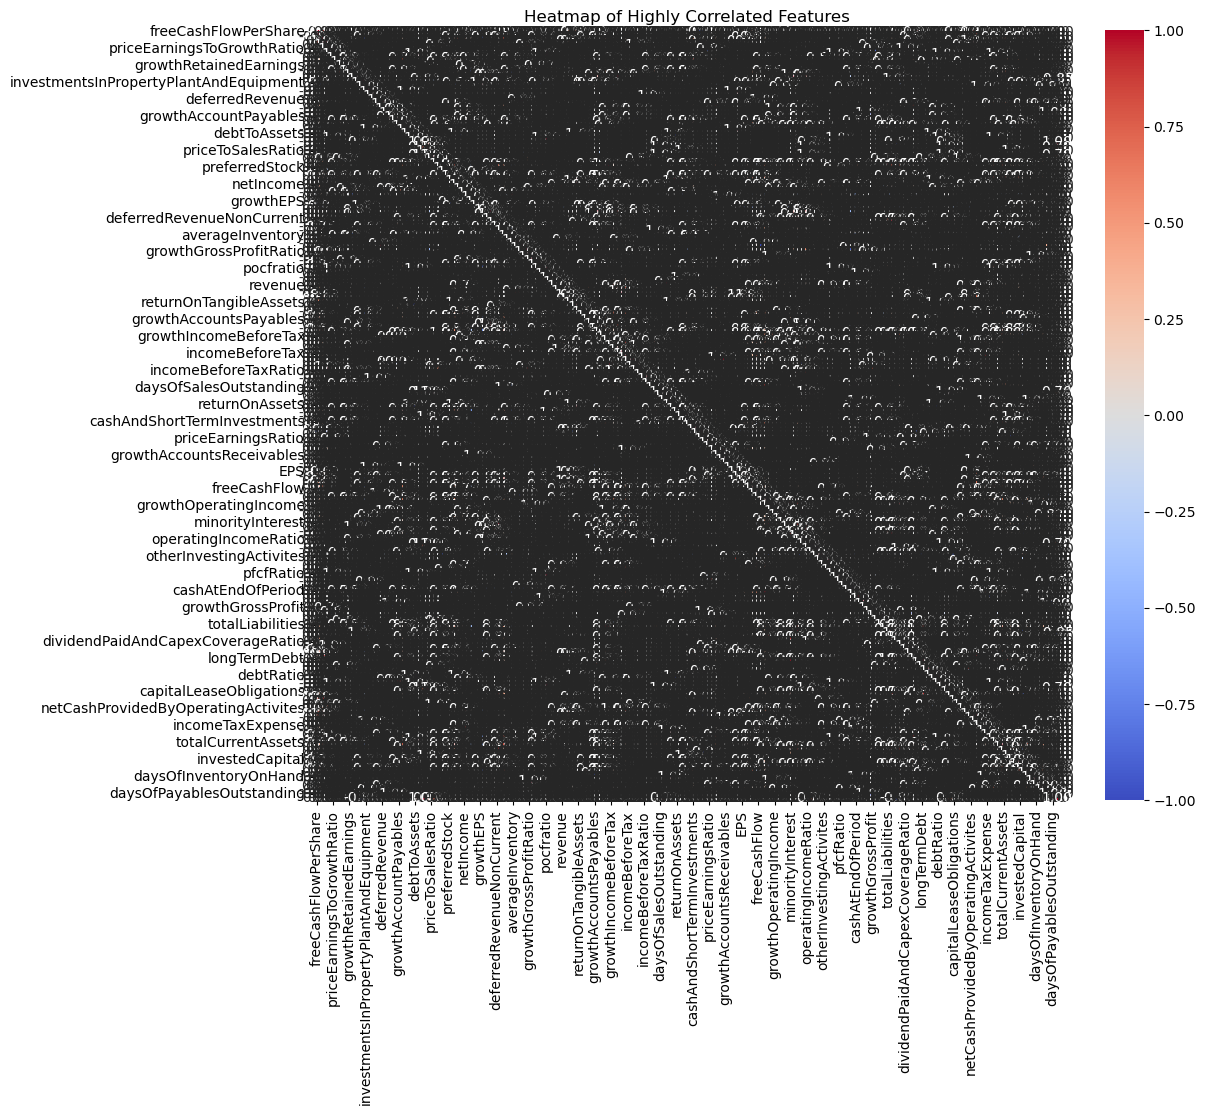

In [4]:
# Step 1: Select only numeric features
numeric_df = full_df[2020].select_dtypes(include=np.number)

# Step 2: Calculate the correlation matrix
corr_matrix = numeric_df.corr().abs()

# Step 3: Identify highly correlated pairs (threshold = 0.8)
def get_highly_correlated_pairs(corr_matrix, threshold):
    high_corr_pairs = []
    # Iterate over the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                high_corr_pairs.append(pair)
    return high_corr_pairs

high_corr_pairs = get_highly_correlated_pairs(corr_matrix, threshold=0.8)

# Display highly correlated pairs
print("Highly correlated pairs (correlation > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Step 4: Calculate Variance Inflation Factor (VIF)
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

vif_df = calculate_vif(numeric_df)

# Display VIF results
print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_df)

# Step 5: Visualize correlations using a heatmap of highly correlated features
# Extract the names of features that are highly correlated
high_corr_features = set([pair[0] for pair in high_corr_pairs] + [pair[1] for pair in high_corr_pairs])

# Create a correlation matrix for these features
high_corr_matrix = numeric_df[list(high_corr_features)].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Highly Correlated Features')
plt.show()


# Data Preprocessing and Feature Selection

### Overview
In this step, we aimed to reduce multicollinearity and retain features that are more predictive of our target variable `'PRICE VAR [%]'`. 

### Steps:
1. **Combine All Datasets**: We merged the yearly datasets into a single DataFrame for comprehensive analysis.
2. **Filter Numeric Columns**: Only numeric features were selected, and missing values were handled.
3. **Calculate Correlation**: We computed the correlation matrix to evaluate both inter-feature correlations and correlations with the target variable.
4. **Identify Highly Correlated Features**: Features with a correlation above 0.9 with other features were identified.
5. **Feature Selection Based on Target**: We removed highly correlated features that had a weaker correlation with the target variable.
6. **Standardize Features Across Years**: We applied the feature selection uniformly across all datasets from 2000 to 2022 to ensure consistency.

### Key Outcome:
We removed 84 features due to high correlation and low predictive power, ensuring a more concise and interpretable dataset for further modeling.


In [ ]:
# Step 1: Combine all datasets for comprehensive analysis
combined_df = pd.concat(full_df.values(), ignore_index=True)

# Select only numeric features (excluding the target variable) and drop columns with missing values
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('PRICE VAR [%]') 
combined_numeric_df = combined_df[numeric_cols + ['PRICE VAR [%]']].dropna()

# Step 1a: Calculate correlation of each feature with the target variable
feature_target_corr = combined_numeric_df.corr()['PRICE VAR [%]'].drop('PRICE VAR [%]')

# Step 2: Calculate the correlation matrix of features
corr_matrix = combined_numeric_df[numeric_cols].corr().abs()

# Step 3: Identify highly correlated feature pairs (threshold = 0.9)
def identify_features_to_remove(corr_matrix, feature_target_corr, threshold):
    features_to_remove = set()
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            feature_i = cols[i]
            feature_j = cols[j]
            if corr_matrix.iloc[i, j] > threshold:
                # Compare correlations with target
                corr_i = abs(feature_target_corr[feature_i])
                corr_j = abs(feature_target_corr[feature_j])
                # Decide which feature to remove
                if corr_i >= corr_j:
                    features_to_remove.add(feature_j)
                else:
                    features_to_remove.add(feature_i)
    return features_to_remove

# Set a correlation threshold
corr_threshold = 0.9

# Identify features to remove
features_to_remove = identify_features_to_remove(corr_matrix, feature_target_corr, corr_threshold)
print(f"Number of features to remove due to high correlation: {len(features_to_remove)}")

# List the features to remove
print("Features to remove:")
for feature in features_to_remove:
    print(f"{feature} (Correlation with target: {feature_target_corr[feature]:.2f})")

# Step 4: Apply feature removal to each year's dataset
for year in full_df:
    df = full_df[year]
    # Ensure consistent column order and drop the identified features
    df = df.drop(columns=features_to_remove, errors='ignore')
    # Update the dictionary with the cleaned DataFrame
    full_df[year] = df

print("Feature removal applied to all yearly datasets based on correlation with the target variable.")

# Step 5: Verify that all datasets have consistent columns
common_columns = set(full_df[next(iter(full_df))].columns)

consistent = True
for year, df in full_df.items():
    if set(df.columns) != common_columns:
        consistent = False
        print(f"Year {year} has different columns.")
        break

if consistent:
    print("All datasets have consistent columns and are ready for merging.")
else:
    print("Datasets have inconsistent columns. Further investigation is needed.")

# Conclusions from Feature Selection

### Summary of Results:
- **84 Features Removed**: These features showed high multicollinearity with others but negligible correlation with the target variable `'PRICE VAR [%]'`.
- **Improved Model Interpretability**: By reducing redundancy, we simplified the dataset and enhanced the potential for model stability and clearer insights.
  
### Key Insights:
1. **Negligible Correlation**: All removed features had a correlation near zero with the target, suggesting minimal impact on price variation.
2. **Reduction of Multicollinearity**: The removal of these features lowers the risk of inflated standard errors and unstable model coefficients.
3. **Focus on Predictive Power**: Retaining features that are more correlated with the target will likely enhance model performance and accuracy.

### What else can we do?
- **Explore Non-linear Models**: Since some features may have non-linear relationships with the target, models like Random Forest or Gradient Boosting should be considered.


# Create target variable for clasiffication

In [ ]:
# Ensure columns are stripped of any extra spaces
for year, df in full_df.items():
    # Clean column names
    df.columns = df.columns.str.strip()

    # Check if the 'PRICE VAR [%]' column exists and then create the label
    if 'PRICE VAR [%]' in df.columns:
        df['class'] = (df['PRICE VAR [%]'] > 0).astype(int)
    else:
        print(f"'PRICE VAR [%]' not found in the dataset for the year {year}")

    # Save the updated dataframe back into the dictionary
    full_df[year] = df
full_df[2020].head(100)

## 4. Outlier Detection

In this step, we will identify and analyze **outliers** in the dataset. Outliers are data points that deviate significantly from the rest of the observations. While some outliers might be the result of errors or anomalies, others may represent important financial events, such as extreme profits or losses.

Outlier detection is essential because these points can disproportionately influence model performance, especially in financial data. Outliers can:
- **Skew Model Predictions**: They can cause models to place undue emphasis on rare cases, leading to biased predictions.
- **Increase Variance**: Outliers can lead to increased variance in the model, making it less robust to new data.

#### Detection Methods:
- **IQR (Interquartile Range)**: Using IQR, we will identify outliers as points falling below Q1 - 2 * IQR or above Q3 + 2 * IQR.

### Strategy for Handling Outliers:
Some outliers might be retained, especially if they provide valuable information about market behavior. However, we will also create datasets where outliers are capped at different thresholds (e.g., 0.1, 0.15, 0.2 quantiles) to see how the model performs with and without these extreme values. This approach will help ensure that we strike the right balance between preserving meaningful outliers and minimizing their negative impact on model accuracy.


In [22]:
# Function to cap outliers using IQR with customizable scaling
def cap_outliers(df, scaling_factor=1.5):
    df_capped = df.copy()
    numeric_cols = df_capped.select_dtypes(include=[np.number]).columns
    
    for column in numeric_cols:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - scaling_factor * IQR
        upper_bound = Q3 + scaling_factor * IQR
        
        # Cap the outliers at the lower and upper bounds
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
    
    return df_capped

# Directory to save the files
output_dir = 'data/cleaned_data/premodeling_data/outliers_data/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of scaling factors to apply (1, 1.5, and 2)
scaling_factors = [1, 1.5, 2]

# Apply the IQR capping for each dataset and each scaling factor
for year, df in full_df.items():
    for scaling_factor in scaling_factors:
        df_capped = cap_outliers(df, scaling_factor=scaling_factor)
        output_path = f"{output_dir}{year}_Capped_outliers_Scaling_{scaling_factor}.csv"
        df_capped.to_csv(output_path, index=False)
        print(f"Saved capped dataset for {year} with scaling factor {scaling_factor} to {output_path}")



Saved capped dataset for 2000 with scaling factor 1 to data/cleaned_data/premodeling_data/outliers_data/2000_Capped_outliers_Scaling_1.csv
Saved capped dataset for 2000 with scaling factor 1.5 to data/cleaned_data/premodeling_data/outliers_data/2000_Capped_outliers_Scaling_1.5.csv
Saved capped dataset for 2000 with scaling factor 2 to data/cleaned_data/premodeling_data/outliers_data/2000_Capped_outliers_Scaling_2.csv
Saved capped dataset for 2001 with scaling factor 1 to data/cleaned_data/premodeling_data/outliers_data/2001_Capped_outliers_Scaling_1.csv
Saved capped dataset for 2001 with scaling factor 1.5 to data/cleaned_data/premodeling_data/outliers_data/2001_Capped_outliers_Scaling_1.5.csv
Saved capped dataset for 2001 with scaling factor 2 to data/cleaned_data/premodeling_data/outliers_data/2001_Capped_outliers_Scaling_2.csv
Saved capped dataset for 2002 with scaling factor 1 to data/cleaned_data/premodeling_data/outliers_data/2002_Capped_outliers_Scaling_1.csv
Saved capped datase

## 5. Next Steps: PCA and Clustering

With the Exploratory Data Analysis (EDA) complete, we will move on to **Feature Engineering** in the next notebook. In this phase, we will create new features, transform existing ones, and prepare the data for model training. Feature engineering is a crucial step in improving model accuracy and ensuring that we extract the most useful information from the dataset.

The key tasks in this notebook will include:

1. **Principal Component Analysis (PCA)**:
   - We will use PCA to reduce the dimensionality of our dataset while preserving the most important information. This will help us address any multicollinearity issues and reduce the complexity of the data, making the model more efficient.

2. **Clustering**:
   - We will apply clustering techniques (e.g., K-Means or hierarchical clustering) to group stocks with similar characteristics. This could help in identifying hidden patterns and relationships between stocks, as well as creating additional features that capture group-level behaviors.


Feature engineering is a vital step toward building an effective machine learning model that can consistently identify stocks capable of outperforming the market.
